In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.stats import skew 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.metrics import roc_curve, roc_auc_score
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import f1_score
from sklearn import metrics

# 1. Loading data

In [2]:
features = pd.read_csv('training_set_features.csv',index_col=0) # check features
features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN


In [3]:
labels = pd.read_csv('training_set_labels.csv',index_col=0) # check labels
labels

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0
...,...,...
26702,0,0
26703,0,0
26704,0,1


Merging features and labels

In [4]:
data = pd.concat([features,labels], axis=1) # merge features and labels
data.to_csv('data.csv')
data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [5]:
print(features.shape)
print(labels.shape)
data.shape

(26707, 35)
(26707, 2)


(26707, 37)

In [6]:
print(features.duplicated().sum()) # check are there any duplicated samples
features_copy = pd.read_csv('training_set_features.csv')
features_copy.duplicated(keep=False).sum()

0


0

In [7]:
features.info() # check data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [8]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   h1n1_vaccine      26707 non-null  int64
 1   seasonal_vaccine  26707 non-null  int64
dtypes: int64(2)
memory usage: 625.9 KB


In [9]:
data.isnull().sum().div(data.shape[0])*100 # check missing rates of all features

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

# 2. EXPLORATORY DATA ANALYSIS

## 2.1 Feature

In [10]:
pd.set_option('display.max_columns', None)
features.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


### 2.1.1 Outlier

23

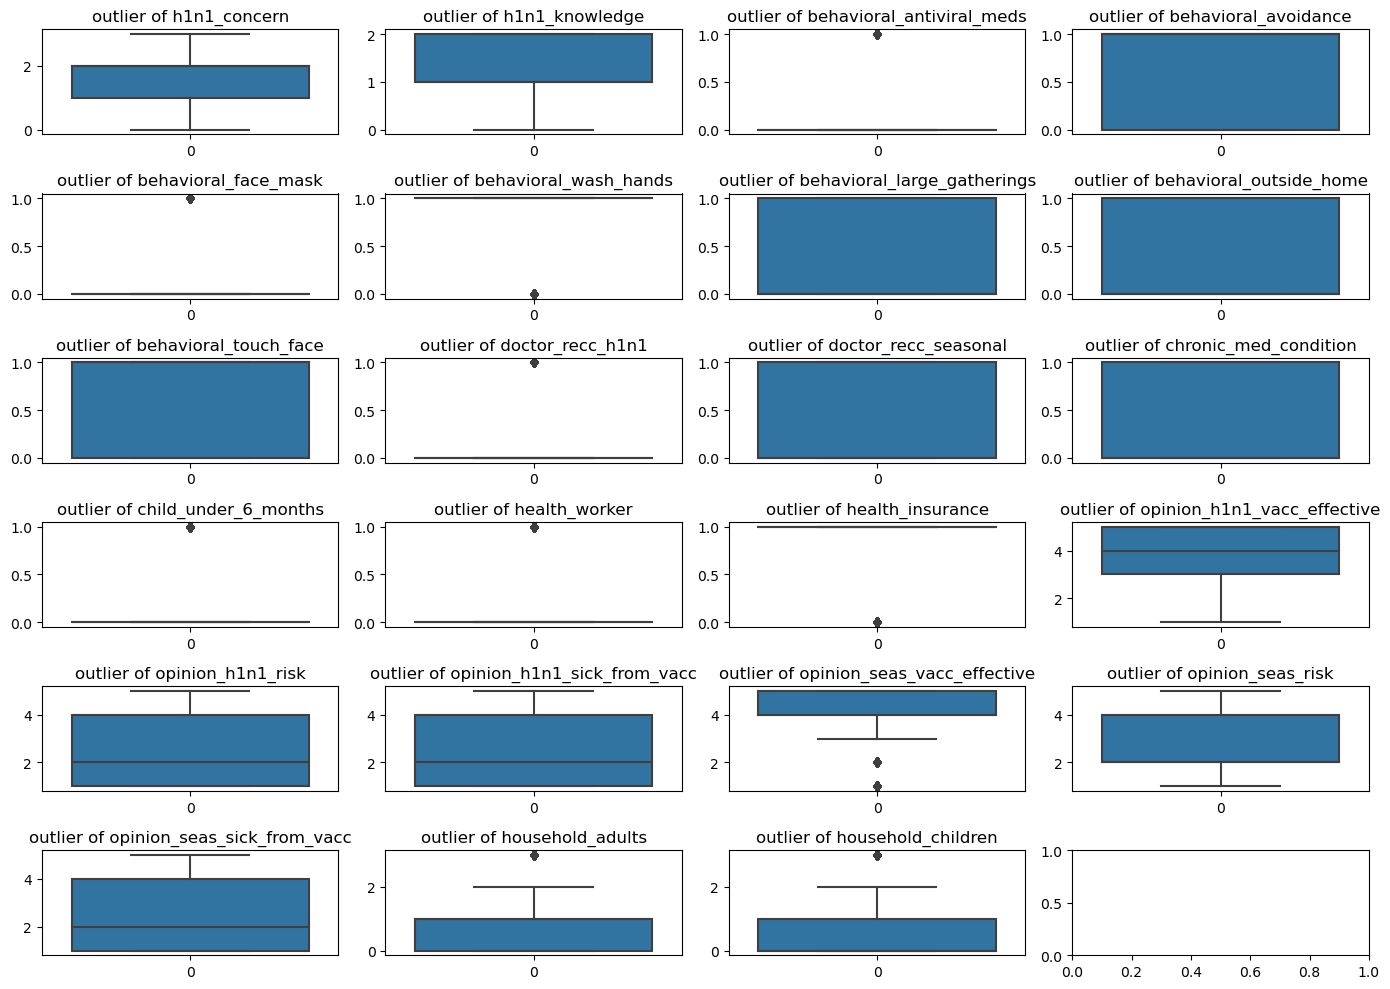

In [11]:
# visualisation of outlier of numerical type features
num_columns = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds','behavioral_avoidance','behavioral_face_mask',
           'behavioral_wash_hands','behavioral_large_gatherings','behavioral_outside_home','behavioral_touch_face',
           'doctor_recc_h1n1','doctor_recc_seasonal','chronic_med_condition','child_under_6_months','health_worker','health_insurance',
           'opinion_h1n1_vacc_effective','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','opinion_seas_vacc_effective','opinion_seas_risk',
           'opinion_seas_sick_from_vacc','household_adults','household_children']
fig, axes = plt.subplots(6,4, figsize = (14,10))
axes = axes.ravel()
for i,column in enumerate(num_columns):
    sns.boxplot(data=data[column],ax = axes[i])
    axes[i].set_title(f'outlier of {column}')
    plt.tight_layout()
len(num_columns)

we can see that some of features seem to have outliers, but most of them are binary features, so we only need to look at the other three features that are not binary and have outliers.

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: opinion_seas_vacc_effective, dtype: int64

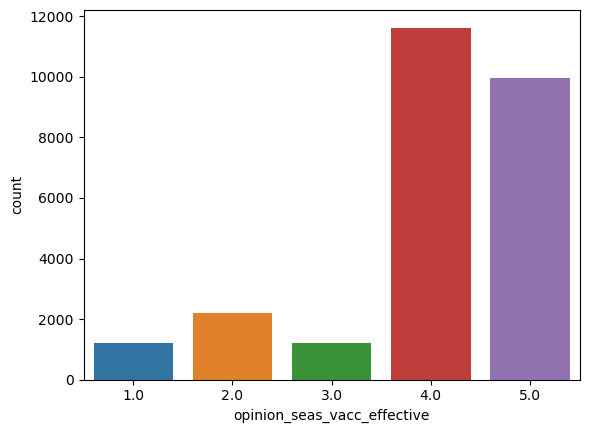

In [12]:
# see the number of different distributions of this feature
# Outliers are caused by quantitative imbalances
sns.countplot(x = features['opinion_seas_vacc_effective']) 
features.opinion_seas_vacc_effective.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: household_adults, dtype: int64

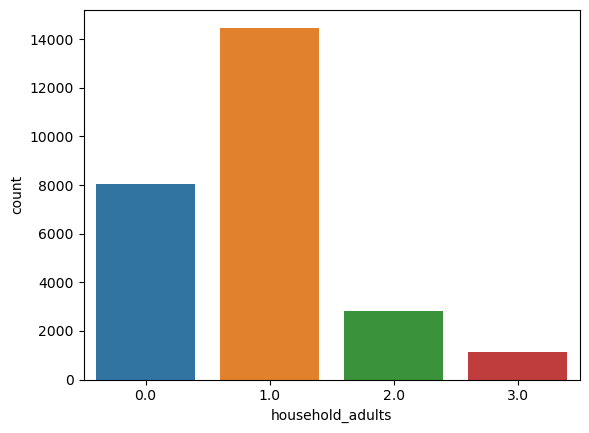

In [13]:
# see the number of different distributions of this feature
# Outliers are caused by quantitative imbalances
sns.countplot(x = features['household_adults'])
features.household_adults.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: household_children, dtype: int64

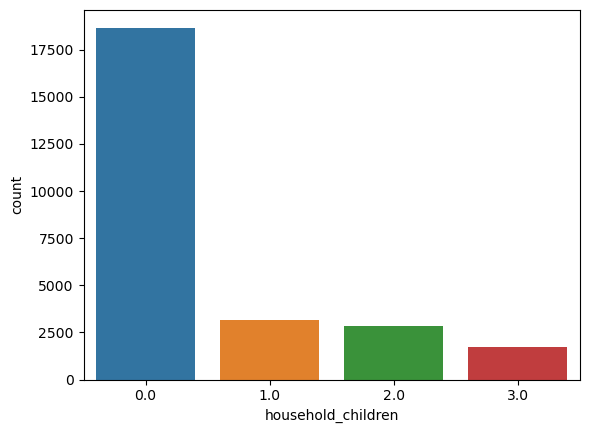

In [14]:
# see the number of different distributions of this feature
# Outliers are caused by quantitative imbalances
sns.countplot(x = features['household_children'])
features.household_children.value_counts()

/var/folders/8_/f2mhhq894zq0fb6t95w76d6m0000gn/T/ipykernel_93579/1460893352.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


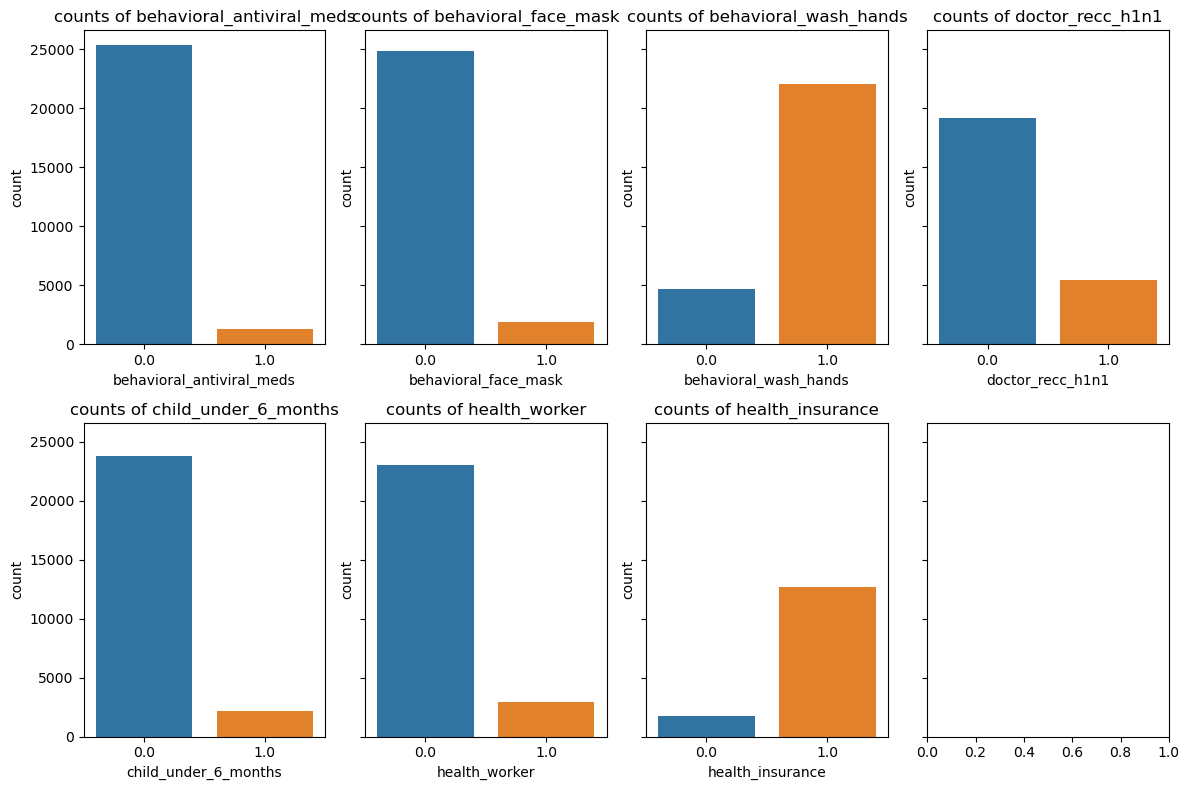

In [15]:
# visualisation outliers of binary features 
outlier_cols = ['behavioral_antiviral_meds','behavioral_face_mask','behavioral_wash_hands','doctor_recc_h1n1','child_under_6_months','health_worker','health_insurance',]
fig, axes =plt.subplots(2,4,constrained_layout=True, figsize=(12,8), sharey = True)
axes = axes.ravel()
for i,col in enumerate(outlier_cols):
    sns.countplot(x = features[col],ax = axes[i])
    features[col].value_counts()
    axes[i].set_title(f'counts of {col}')
    plt.tight_layout()

In [16]:
def features_chart(col): # define a function to visualise the distribution counts of features    
    fig,axes = plt.subplots(1,2,sharey=True,figsize = (6,3))
    sns.countplot(x = col, hue = 'h1n1_vaccine',data = data,ax = axes[0])
    axes[0].set_title(col)
    sns.countplot(x = col, hue = 'seasonal_vaccine',data = data, ax = axes[1])
    axes[1].set_title(col)
    plt.tight_layout()


## 2.1.2 Analysis

As can be seen from the following icons
- The degree of concern of 'h1n1_concern' has a greater impact on the vaccination rate. The more serious the degree of concern, the higher the percentage of people vaccinated.
- 'h1n1_knowledge': also presents a similar situation
- 'behavioral_antiviral_meds': provides little information as only a small number of people take medicines to prevent getting sick, showing a similar picture to total vaccinations
- 'behavioral_avoidance': has little effect, most people will avoid contact with people with flu symptoms, but it has no significant effect on the probability of being vaccinated
- 'behavioral_face_mask': has very few people wearing masks and cannot provide information
- 'behavioral_wash_hands': has little information and the ratio gap is too large
- 'behavioral_large_gatherings': gathering crowds have an impact on the vaccination rate, and the proportion of injections that go to gatherings is high
- 'behavioral_outside_home': people who have no contact with the outside world have more injections
- 'behavioral_touch_face':
- 'doctor_recc_h1n1':Can be removed when calculating seasonal, the relationship is not big
- 'doctor_recc_seasonal':Can be removed when calculating H1N1, the relationship is not big
- 'chronic_med_condition':
- 'child_under_6_months': not informative, scale gap is too large
- 'health_worker': can't provide useful information, the proportion gap is too large
- 'health_insurance': does not provide useful information, the scale gap is too large
- 'all opinion features’:The correlation is relatively strong, and it may be possible to manually perform feature engineering
- 'household_adults':
- 'household_children': There are more seasonal vaccinations without children in the family, and there is no obvious difference in h1n1

/var/folders/8_/f2mhhq894zq0fb6t95w76d6m0000gn/T/ipykernel_93579/2145832708.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axes = plt.subplots(1,2,sharey=True,figsize = (6,3))


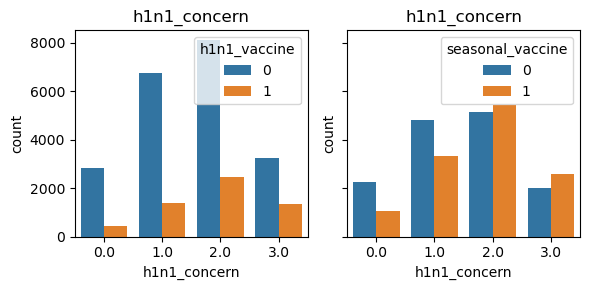

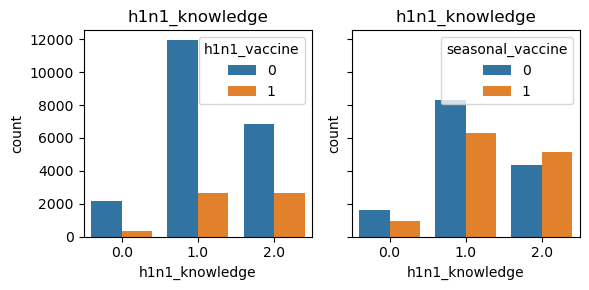

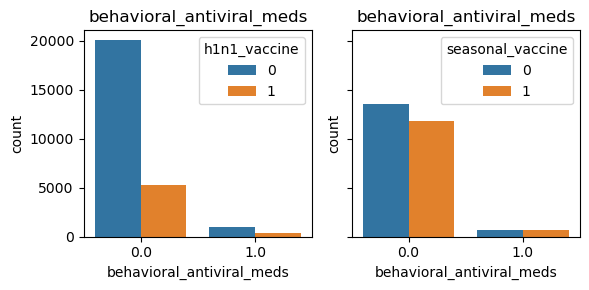

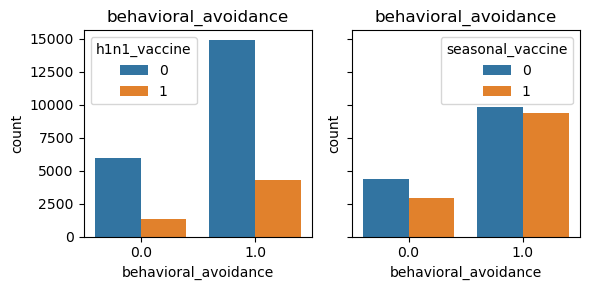

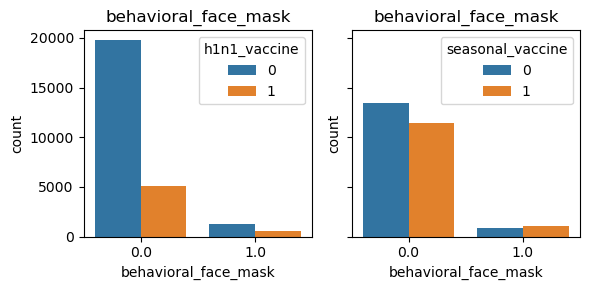

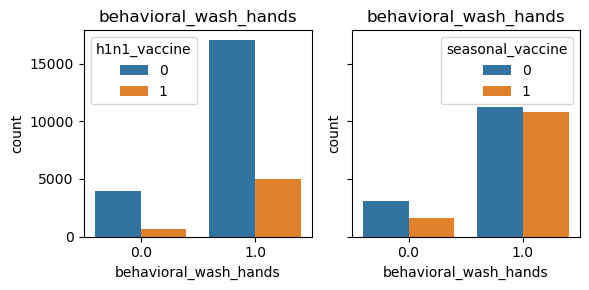

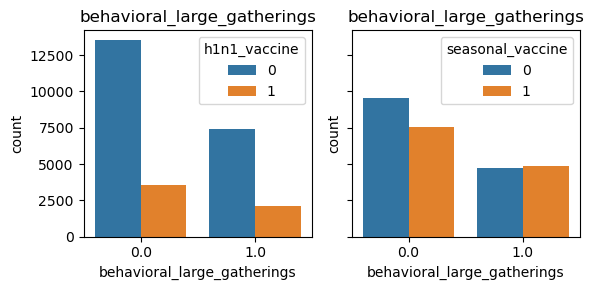

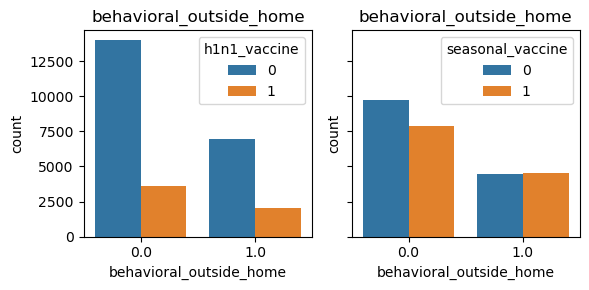

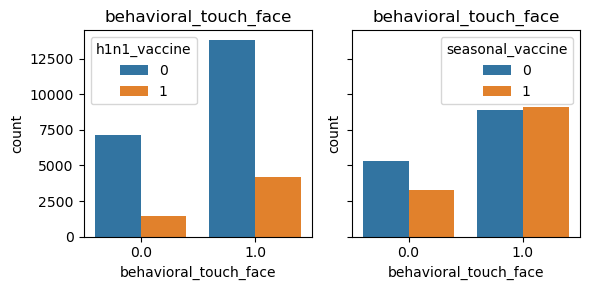

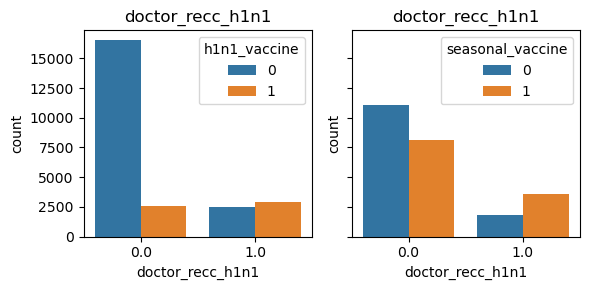

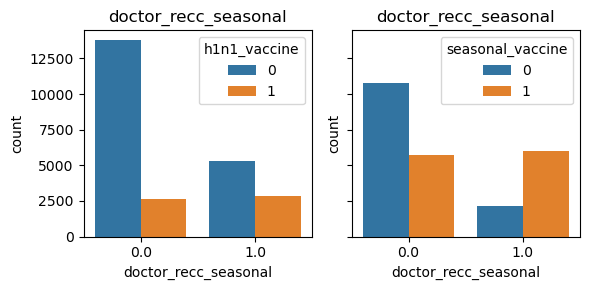

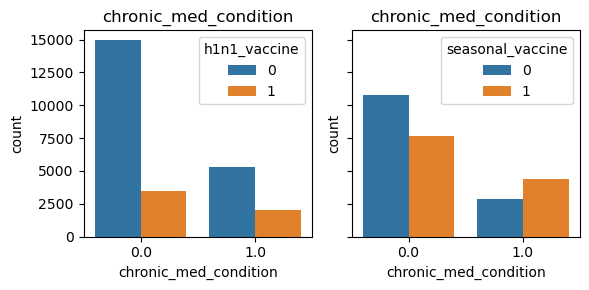

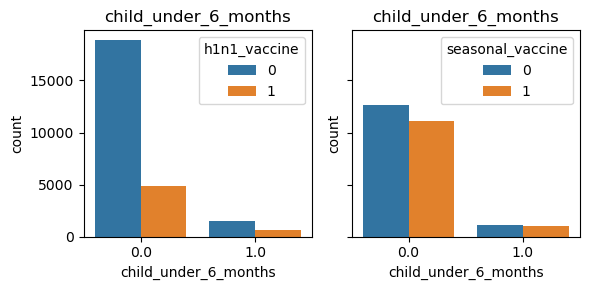

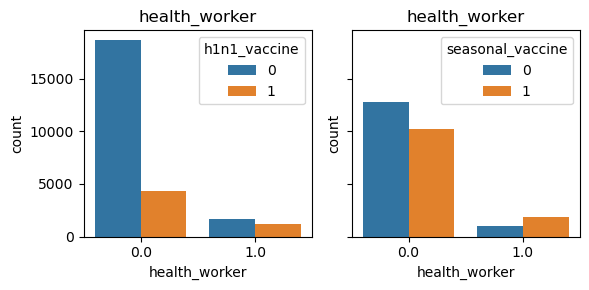

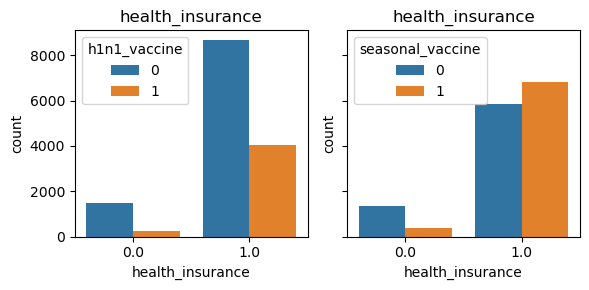

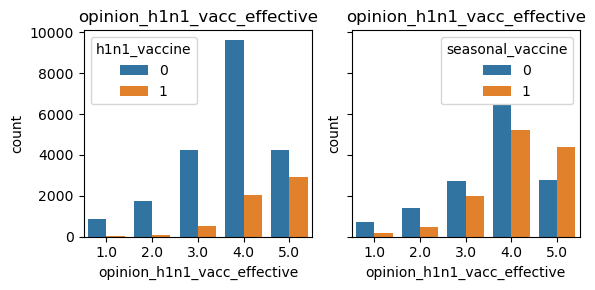

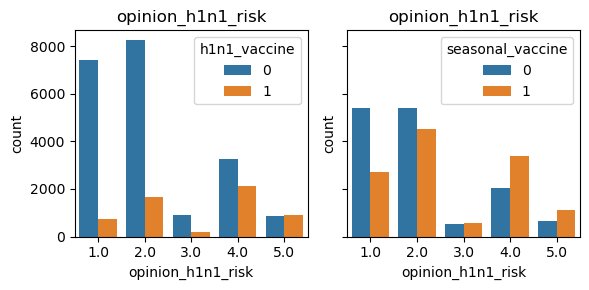

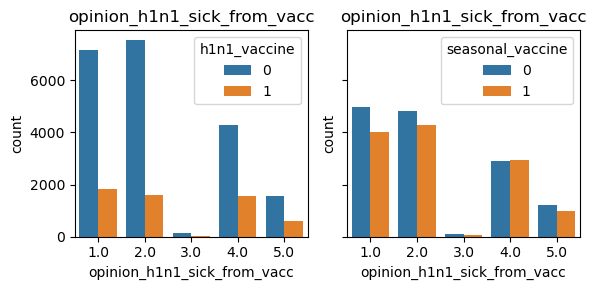

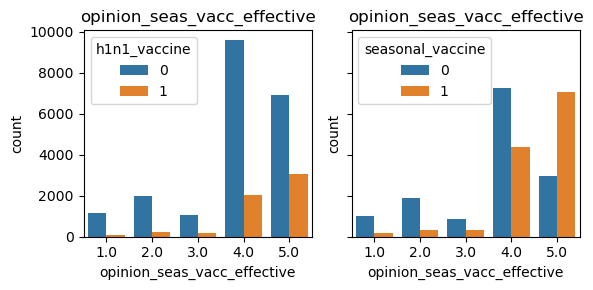

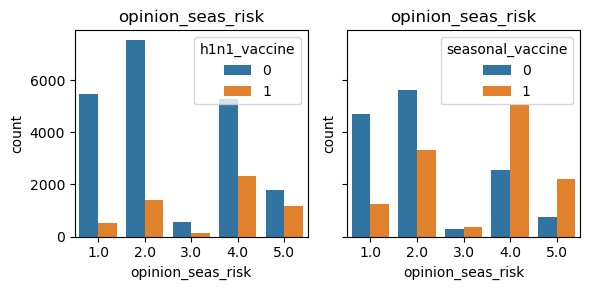

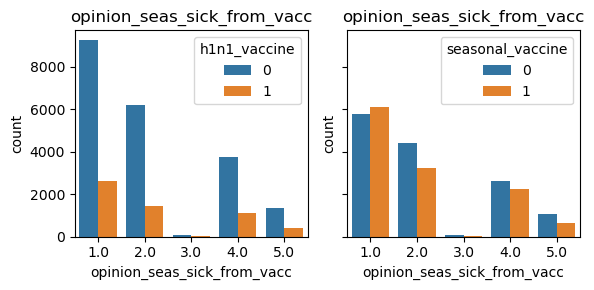

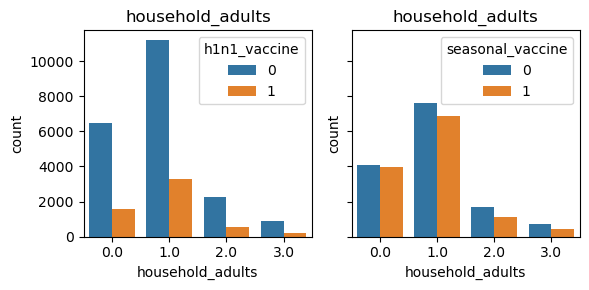

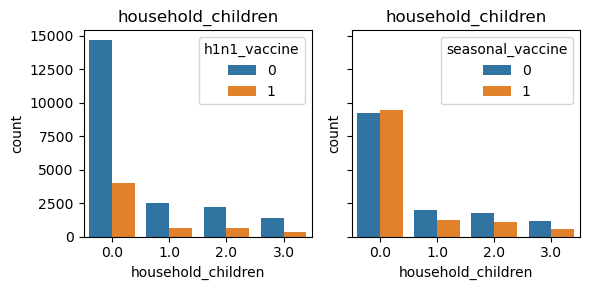

In [17]:
for col in num_columns:
    features_chart(col)

In [18]:
str_data = data.select_dtypes(include='object').columns # put all object type features into str_data
def str_features_chart(col):    # visualise the number of str_data
    fig,axes = plt.subplots(1,2,sharey=True,figsize = (12,5))
    sns.countplot(x = col, hue = 'h1n1_vaccine',data = data,ax = axes[0])
    axes[0].set_title(col)
    axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 25)
    sns.countplot(x = col, hue = 'seasonal_vaccine',data = data, ax = axes[1])
    axes[1].set_title(col)
    axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 25)
    plt.tight_layout()

In [19]:
data['age_group'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

- age_group: h1n1 vaccine has no obvious trend in age distribution, it is more neutral, but for seasonal influenza vaccine, the older the person, the higher the probability of vaccination
- education: The two vaccines show the same trend, but are relatively neutral and have no obvious information
- race: no obvious information
- sex: no obvious information
- income_poverty: No obvious information
- marital_status: high probability of vaccination for marriage
- rent or own: Those who have housing have a high probability of vaccination
- employment_status: not in labor force The proportion of inoculation is high
- Vaccination rates were similar at both sites, providing no obvious information
- Some companies have a high proportion of vaccinations, but the data is missing too much

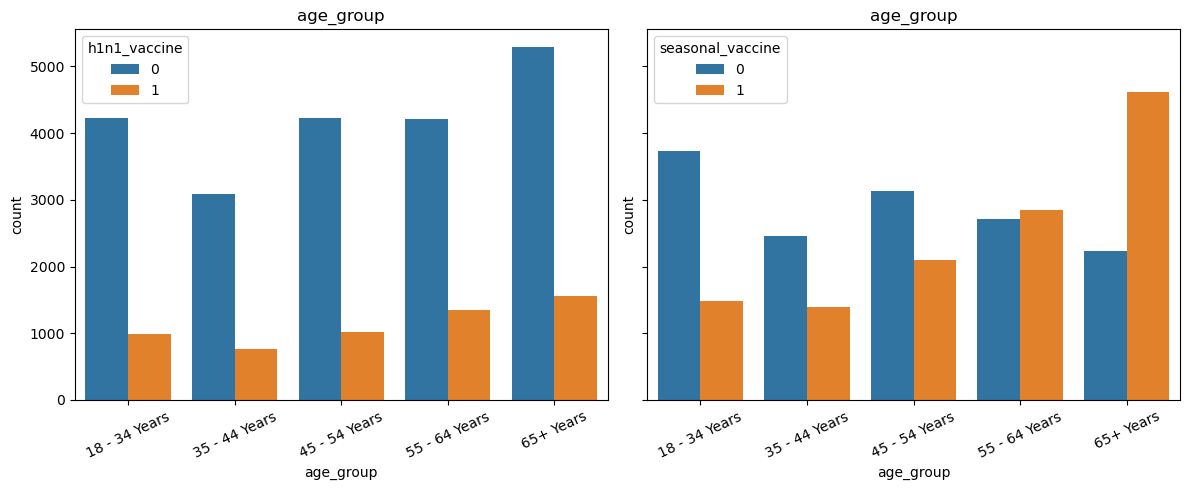

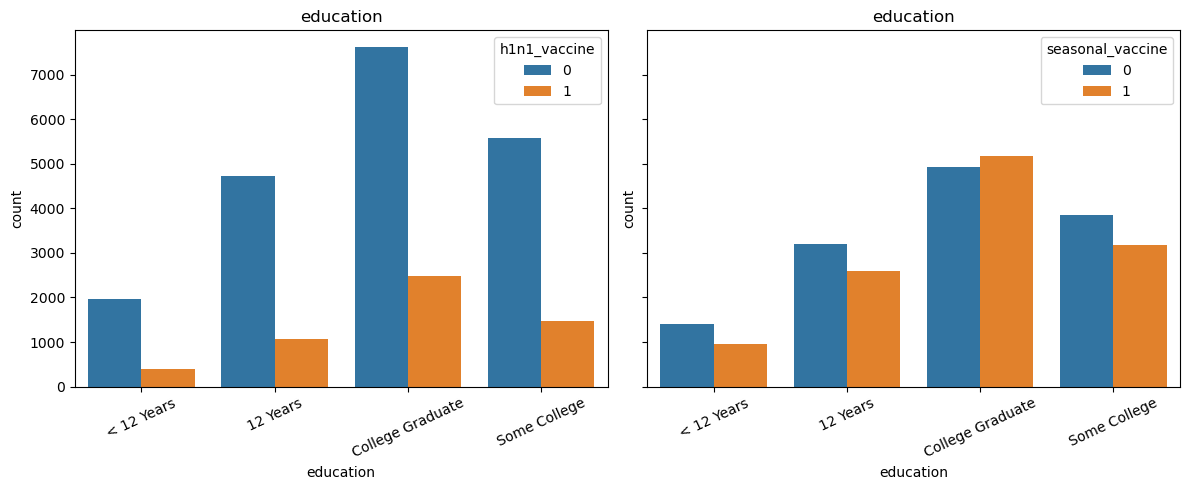

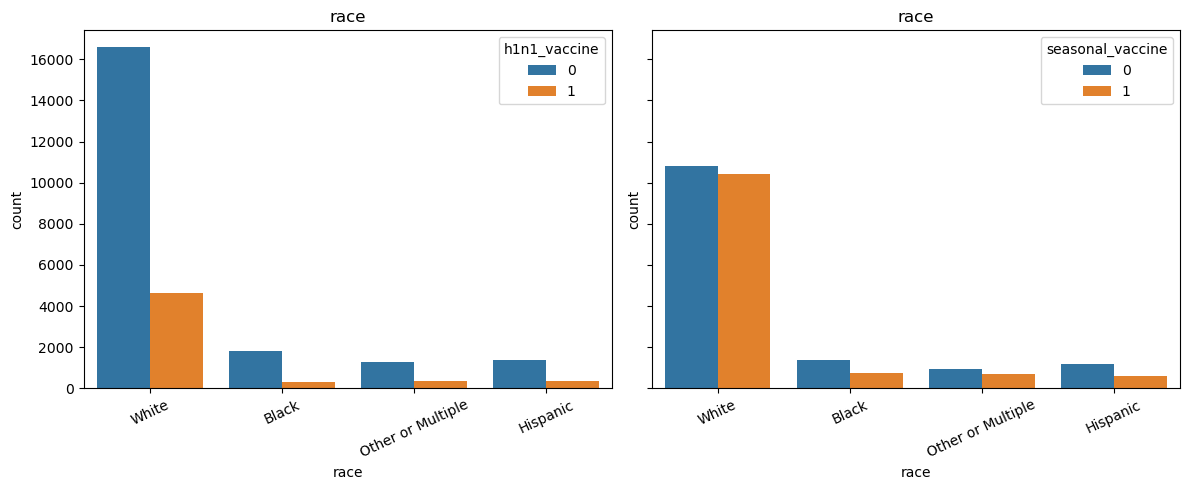

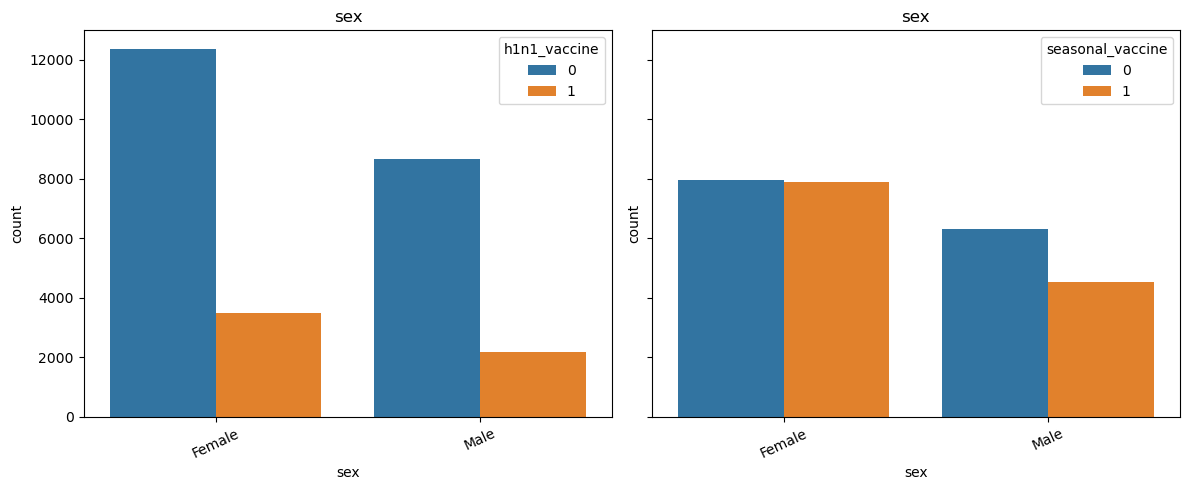

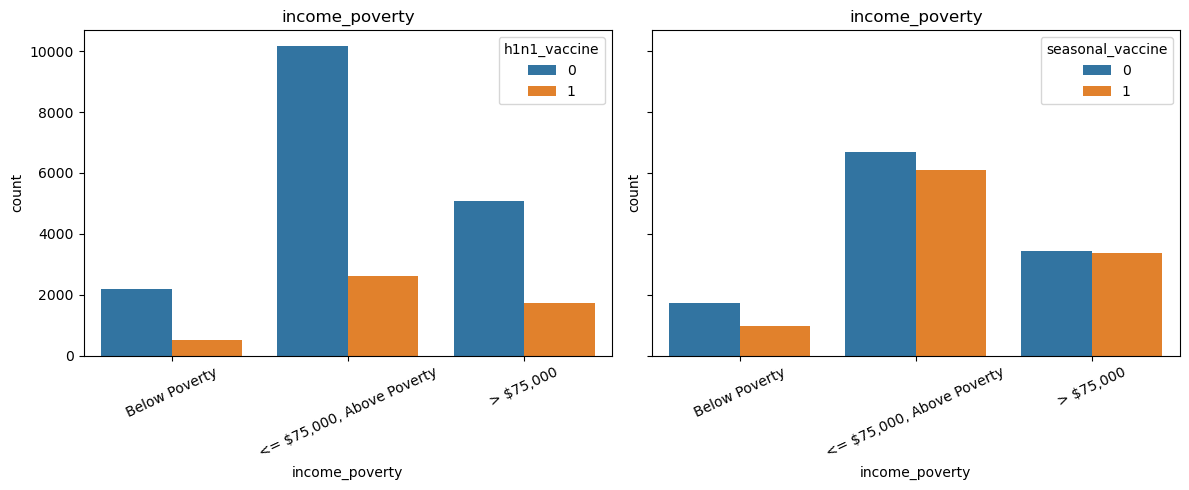

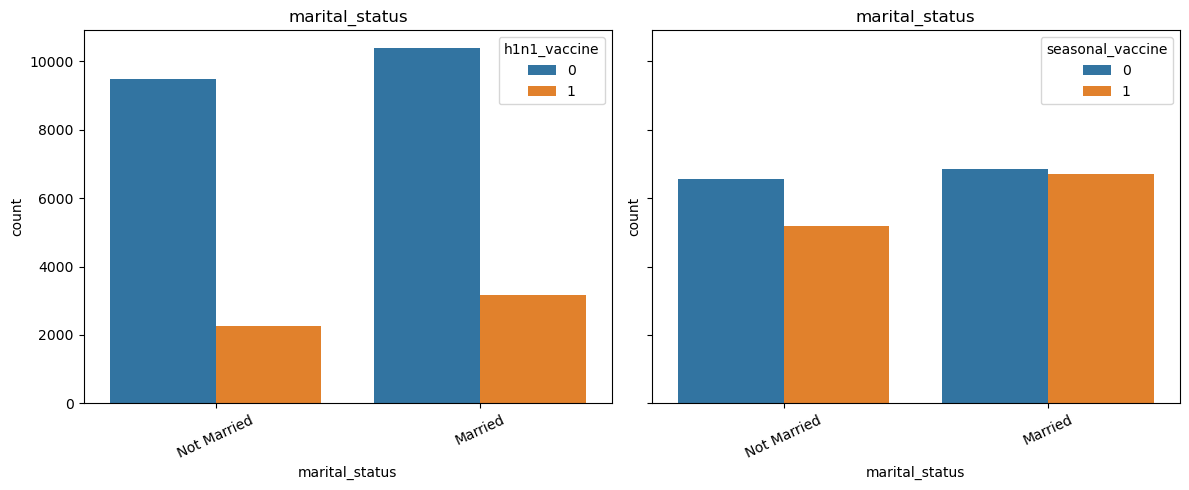

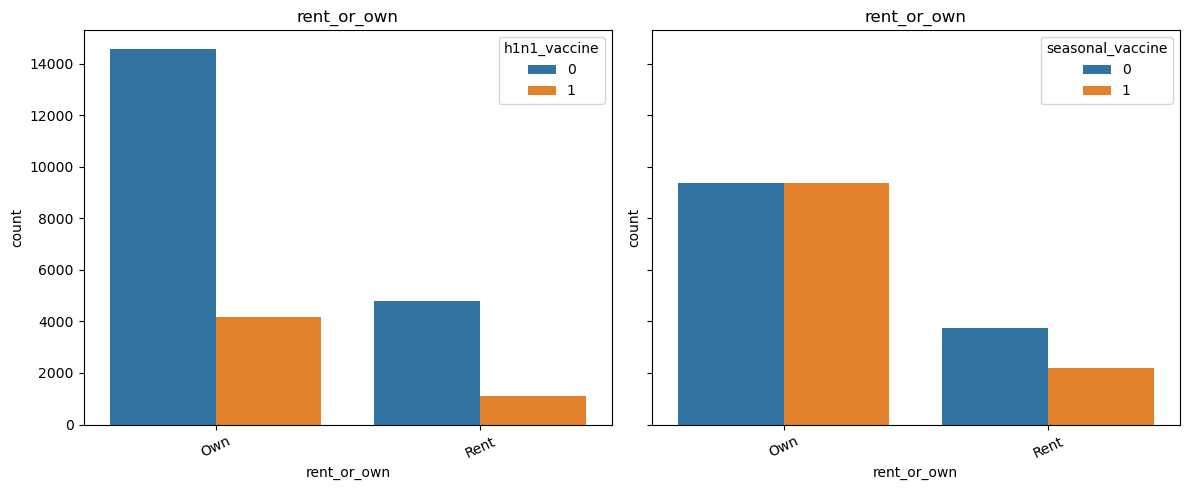

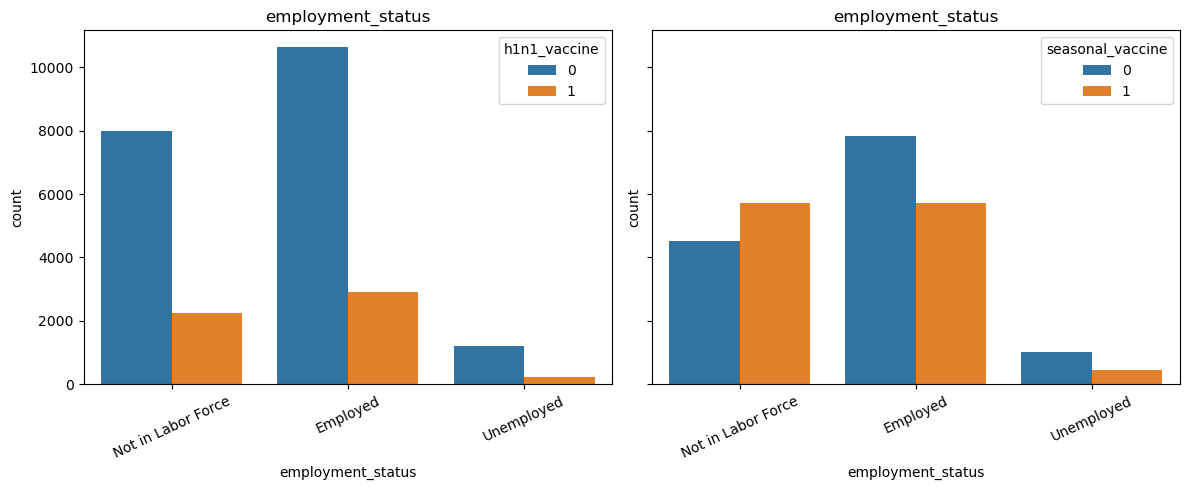

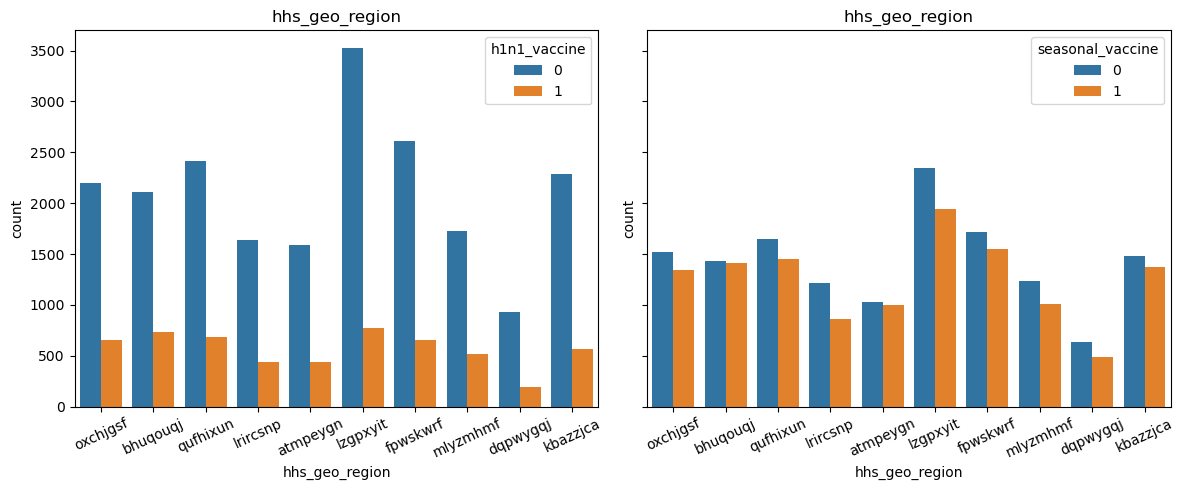

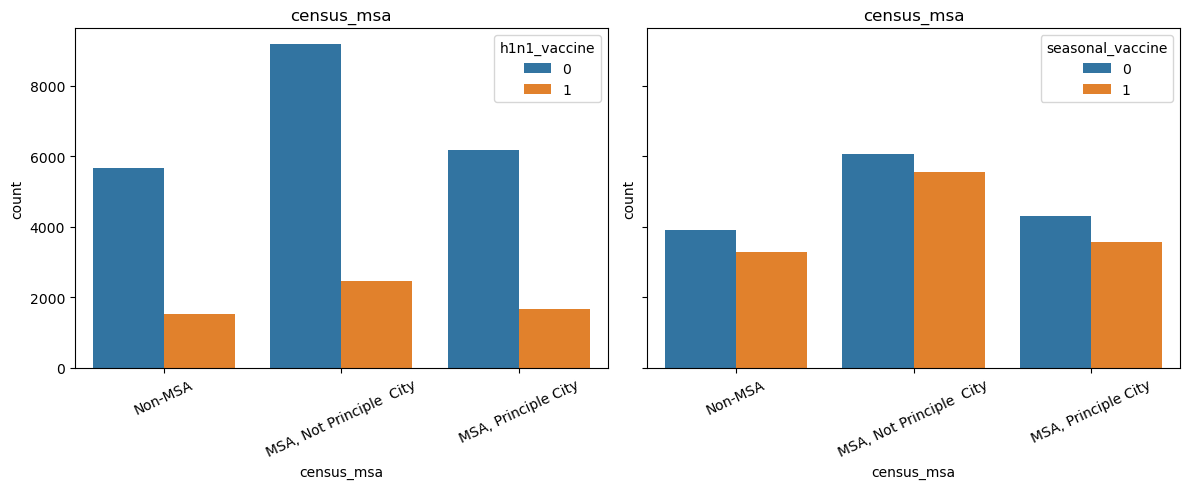

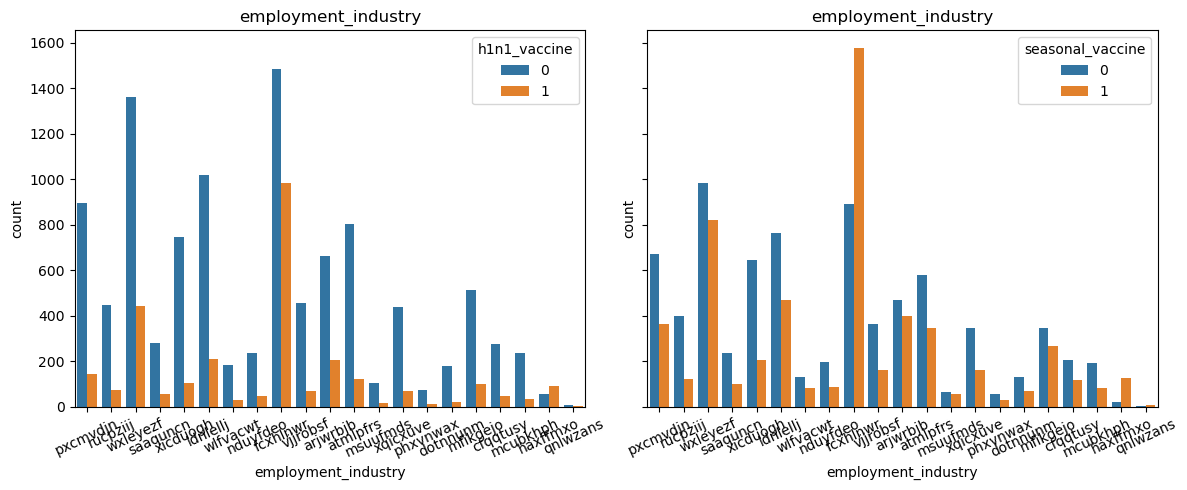

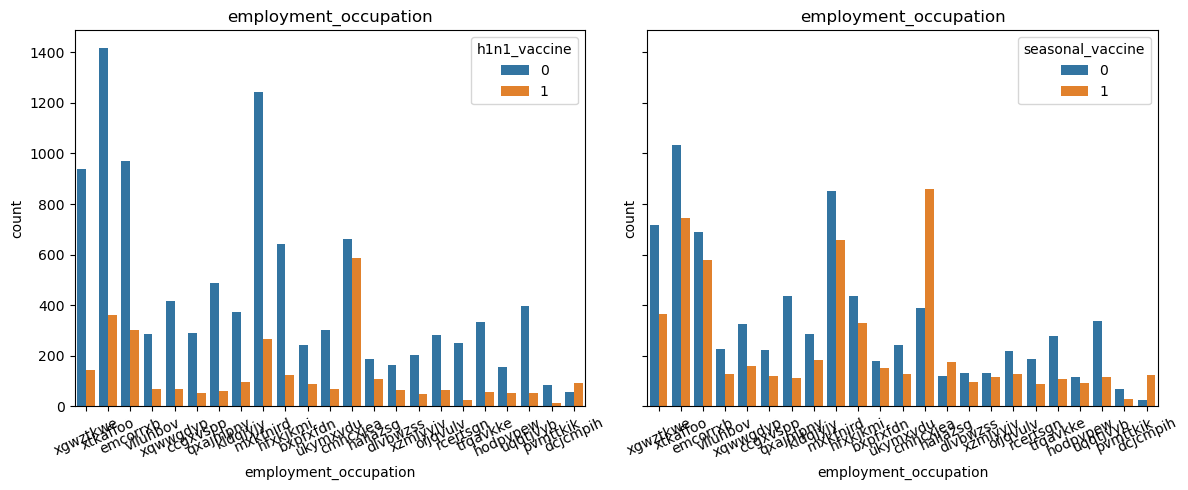

In [20]:
fig,axes = plt.subplots(1,2,sharey=True,figsize = (12,5)) # Age is not in order when visualizing age group features, so it needs to be handled separately
sns.countplot(x = 'age_group', hue = 'h1n1_vaccine',data = data,ax = axes[0],order=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'])
axes[0].set_title('age_group')
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation = 25)
sns.countplot(x = 'age_group', hue = 'seasonal_vaccine',data = data, ax = axes[1],order=['18 - 34 Years','35 - 44 Years','45 - 54 Years','55 - 64 Years','65+ Years'])
axes[1].set_title('age_group')
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation = 25)
plt.tight_layout()
for col in str_data[1:13]:# # visualise the number of str_data
    str_features_chart(col)

## 2.2 Labels

From the pictures and calculated percentages, it can be seen that among all samples, about 80% of people have not been vaccinated with H1Z1 vaccine, while the vaccination rate for seasonal flu is close to 50%.

This being a multi-label problem, we have to keep in mind that the h1n1 target class is quite imbalanced. The seasonal vaccine class is more balanced, but we'll have to keep tabs on this once we start modeling.

A very small rate of people received both seasonal as well as h1n1 vaccines.

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64
0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64
0    14272
1    12435
Name: seasonal_vaccine, dtype: int64


0    0.534392
1    0.465608
Name: seasonal_vaccine, dtype: float64

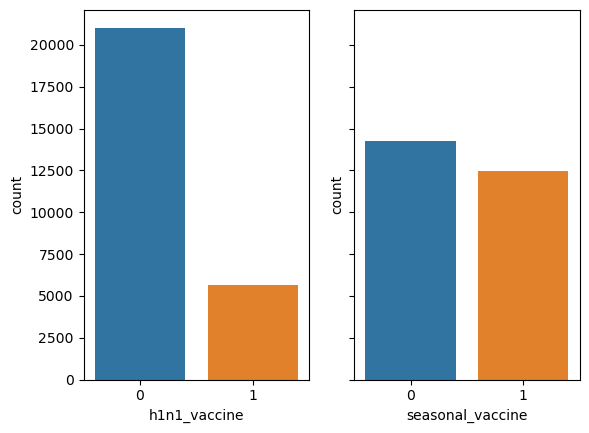

In [21]:
# Visualize the number of labels inoculated with h1n1 and seasonal respectively
fig, axes = plt.subplots(1,2,sharey=True)
sns.countplot(x = labels['h1n1_vaccine'],ax = axes[0])
sns.countplot(x = labels['seasonal_vaccine'], ax= axes[1])
print(labels['h1n1_vaccine'].value_counts())
print(labels['h1n1_vaccine'].value_counts().div(labels.shape[0])) #calculate the percentages
print(labels['seasonal_vaccine'].value_counts())
labels['seasonal_vaccine'].value_counts().div(labels.shape[0])

In [22]:
pd.crosstab(labels['h1n1_vaccine'], labels['seasonal_vaccine'], margins=True, normalize=True)# See the relationship between vaccinations

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


Moderately relevant

In [23]:
labels[['h1n1_vaccine', 'seasonal_vaccine']].corr() # View correlation coefficients

,h1n1_vaccine,seasonal_vaccine
h1n1_vaccine,1.000000,0.377143
seasonal_vaccine,0.377143,1.000000


# 3. Preprocessing

In [24]:
all_data = pd.read_csv('data.csv',index_col=0)
all_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


## 3.1 Missing data

In [25]:
all_data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

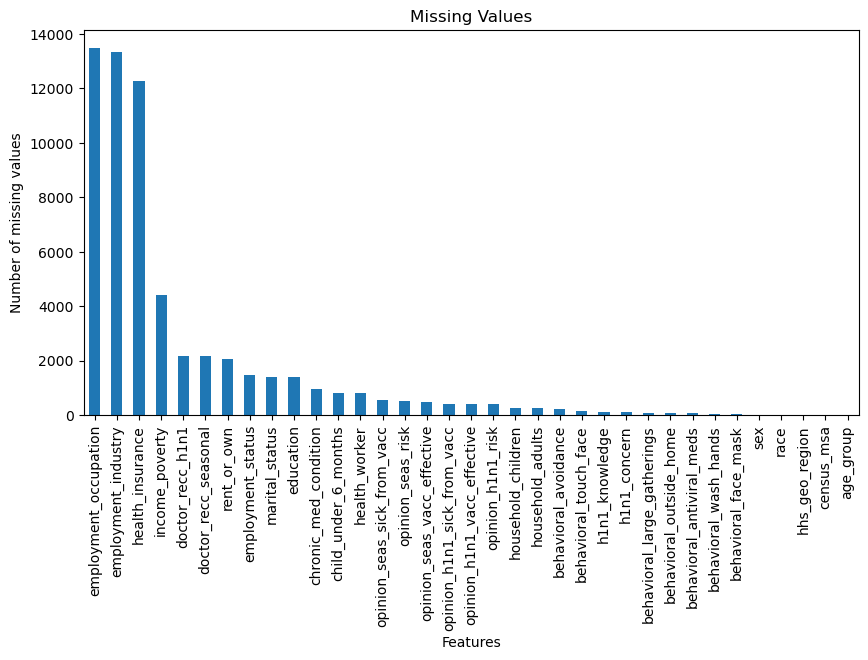

In [26]:
# Count the number of missing values in all features
missing_values_count = features.isnull().sum()
# Visualisation missing rate
plt.figure(figsize=(10,5))
missing_values_count.sort_values(ascending=False).plot(kind='bar')
plt.title('Missing Values')
plt.xlabel('Features')
plt.ylabel('Number of missing values')
# plt.xticks(rotation = 30)
plt.show()

It can be seen that the missing rate of health_insurance is very high and the correlation with other features is very low from the heatmap, considering drop
employment_industry and employment_occupation are missing a lot and I can't find any data online to add them
However, they are highly correlated with each other and with age, and employment_status is highly correlated
I tried to drop employment_industry and employment_occupation, and check the correlation between employment_status and other characteristics, no significant change, try to drop


/var/folders/8_/f2mhhq894zq0fb6t95w76d6m0000gn/T/ipykernel_93579/818669743.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = features.corr()


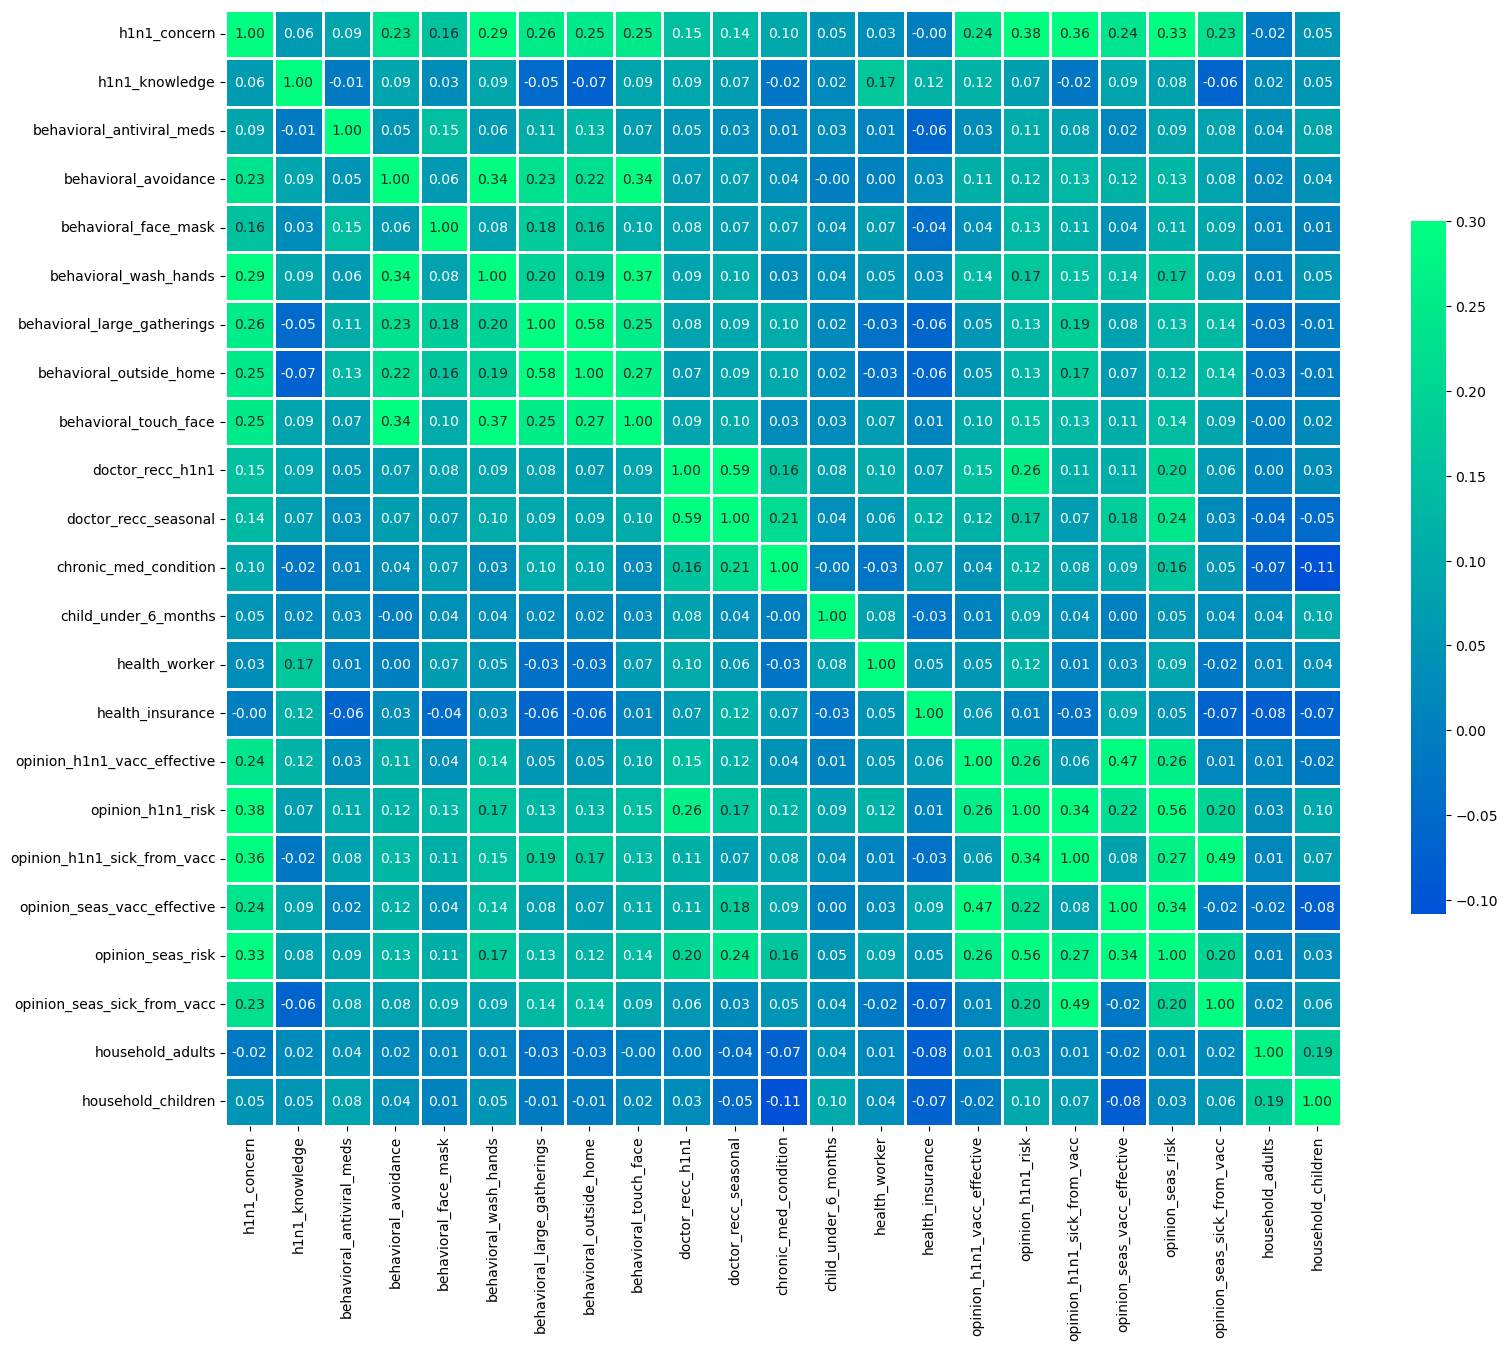

In [27]:
# Use heat maps to see the relationship between numeric features
corr = features.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='winter')
g.figure.set_size_inches(18,18)
    
plt.show()

The LabelEncoder will also mark the null as a number, so you need to fill in the blanks before the LabelEncoder, or use other notation first for the time being

In [28]:
copy_data = all_data.copy() # Copy a copy of the data to see what number the labelencoder has marked nan as
catagory_data = all_data.select_dtypes(include='object').columns
all_data[catagory_data].fillna(value='missing', inplace=True)
LE = LabelEncoder()
for col in catagory_data:
    copy_data[col] = LE.fit_transform(copy_data[col])

/var/folders/8_/f2mhhq894zq0fb6t95w76d6m0000gn/T/ipykernel_93579/3419909977.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data[catagory_data].fillna(value='missing', inplace=True)


In [29]:
print(all_data['education'].value_counts()) # missing:4
print(all_data['income_poverty'].value_counts()) # missing:3
print(all_data['marital_status'].value_counts()) # missing:2
print(all_data['rent_or_own'].value_counts()) # missing:2
all_data['employment_status'].value_counts() # missing:3

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: education, dtype: int64
<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64
Married        13555
Not Married    11744
Name: marital_status, dtype: int64
Own     18736
Rent     5929
Name: rent_or_own, dtype: int64


Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment_status, dtype: int64

In [30]:
all_data.isnull().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

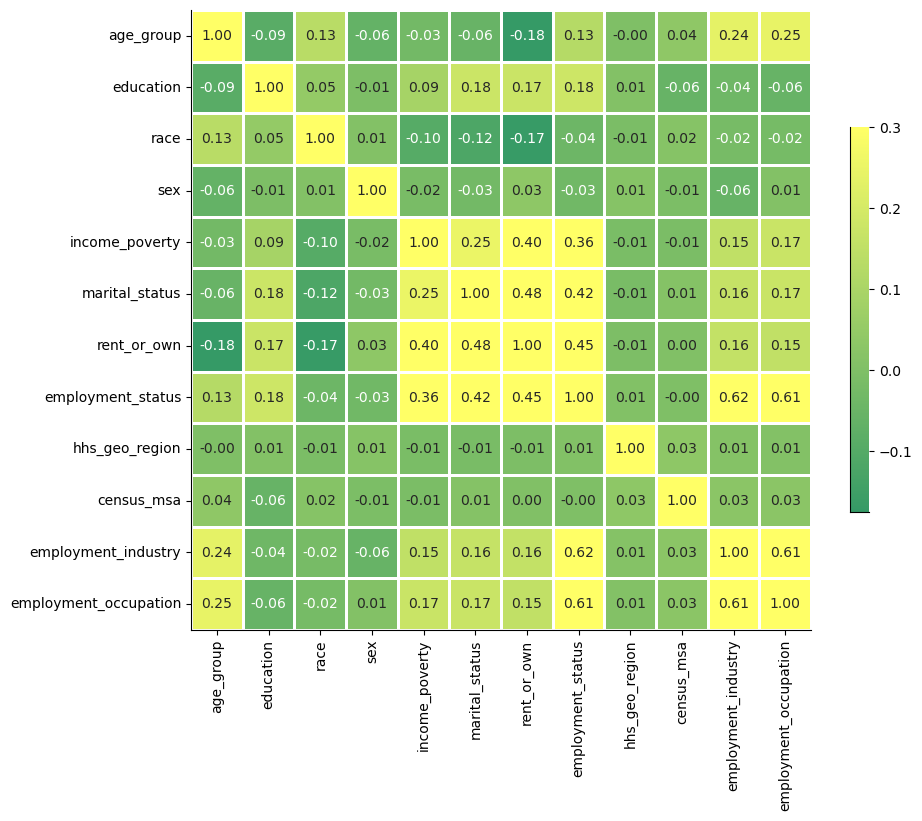

In [31]:
# Using heatmaps to view data associativity of object types
corr = copy_data[catagory_data].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='summer')
sns.despine()
g.figure.set_size_inches(10,10)
   
plt.show()

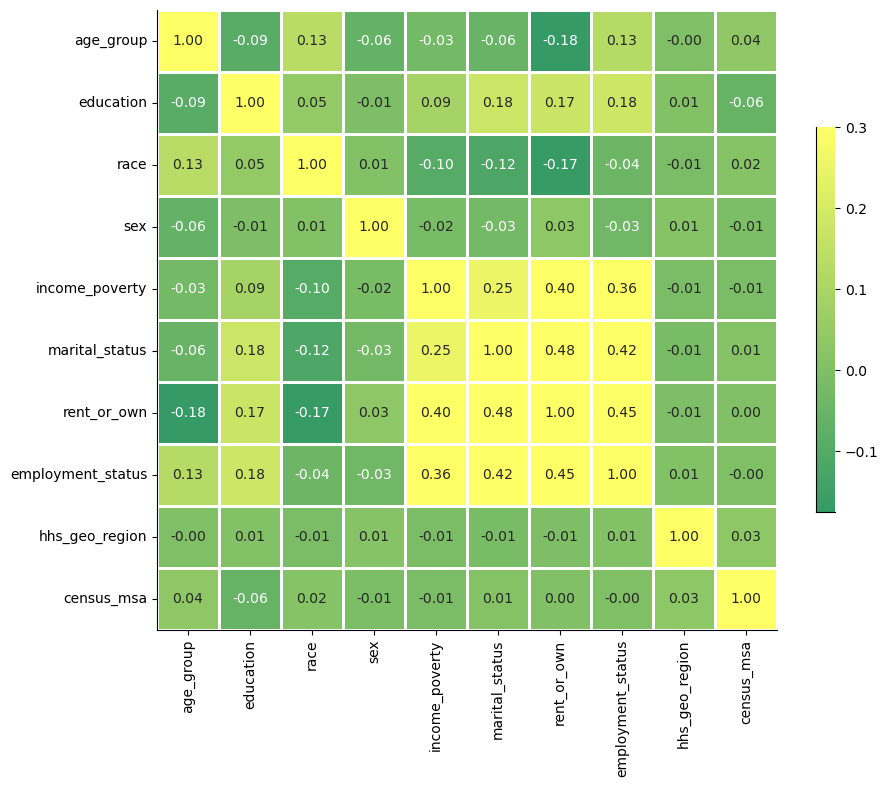

In [32]:
# Check the correlation between features after removing two features
corr = copy_data[catagory_data.drop(['employment_industry','employment_occupation'])].corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='summer')
sns.despine()
g.figure.set_size_inches(10,10)
   
plt.show()

In [33]:
all_data.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True) # Try to remove these three features
features.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True) # Try to remove these three features

In [34]:
all_data

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,0,1


In [35]:
features

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0


## 3.2 Data imputation

In [36]:
num_data = [] # Putting numeric features into num_data
for col in features.columns.to_list():
    if features[col].dtype != 'object':
        num_data.append(col)

str_data = [] # Putting object features into str_data
for col in features.columns.to_list():
    if features[col].dtype == 'object':
        str_data.append(col)
print(num_data)
str_data

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [37]:
# Additional numeric types
for col in num_data:
    mean = round(all_data[col].mean())
    imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=mean) # mean
    all_data[col] = imputer.fit_transform(all_data[[col]])

In [38]:
# Complementary classification types, random complements, randomly selecting a value from a known classification to fill in the missing values. This can be done using the random.choice() method in NumPy.
for col in str_data:
    categories = all_data[col].dropna().unique()
    all_data[col] = all_data[col].apply(lambda x: np.random.choice(categories) if pd.isna(x) else x)

In [39]:
# Attempts to use crowd-sourced replenishment, but this leads to skewed data, excluding this method
# imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
# for column in all_data.columns.to_list():
#     all_data[column] = imputer.fit_transform(all_data[[column]])

In [40]:
all_data.isnull().sum()

h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_region                 0
census_msa                     0
household_

In [41]:
all_data.shape

(26707, 34)

## 3.3 Skewed Data Process

In [42]:
numeric_feats = features.dtypes[features.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = features[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head(10)) # View the first ten figures

features[skewness.index] = np.log1p(features[skewness.index]) #Smoothing skewed data

                                 Skew
behavioral_antiviral_meds    4.186267
behavioral_face_mask         3.401553
child_under_6_months         3.032832
health_worker                2.461945
household_children           1.543815
doctor_recc_h1n1             1.349659
chronic_med_condition        0.962041
opinion_seas_sick_from_vacc  0.919535
household_adults             0.786528
doctor_recc_seasonal         0.724353


## 3.4 Encoded using Label Encodings

In [43]:
# Labelling of the completed data with labelencoder
LE = LabelEncoder()
for col in all_data.columns.to_list():
    all_data[col] = LE.fit_transform(all_data[col])

In [44]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   h1n1_concern                 26707 non-null  int64
 1   h1n1_knowledge               26707 non-null  int64
 2   behavioral_antiviral_meds    26707 non-null  int64
 3   behavioral_avoidance         26707 non-null  int64
 4   behavioral_face_mask         26707 non-null  int64
 5   behavioral_wash_hands        26707 non-null  int64
 6   behavioral_large_gatherings  26707 non-null  int64
 7   behavioral_outside_home      26707 non-null  int64
 8   behavioral_touch_face        26707 non-null  int64
 9   doctor_recc_h1n1             26707 non-null  int64
 10  doctor_recc_seasonal         26707 non-null  int64
 11  chronic_med_condition        26707 non-null  int64
 12  child_under_6_months         26707 non-null  int64
 13  health_worker                26707 non-null  i

In [45]:
features = all_data.drop(['h1n1_vaccine','seasonal_vaccine'],axis = 1)

In [46]:
all_data.drop(['h1n1_vaccine','seasonal_vaccine'],axis = 1).to_csv('clean_features.csv')

# 4. Feature Importance

In [47]:
y_h1n1=all_data['h1n1_vaccine'] # h1n1 label
y_seas=all_data['seasonal_vaccine'] # seasonal label
X_h1n1=features.drop(['opinion_seas_vacc_effective', 'doctor_recc_seasonal','opinion_seas_risk','opinion_seas_sick_from_vacc'], axis = 1) # Remove features that are not relevant to this data and reduce the error
X_seas=features.drop(['opinion_h1n1_vacc_effective', 'h1n1_concern','opinion_h1n1_risk','opinion_h1n1_sick_from_vacc','h1n1_knowledge','doctor_recc_h1n1'], axis = 1) # Remove features that are not relevant to this data and reduce the error

## 4.1 H1N1_Importance

In [48]:
model_h1n1 = RandomForestRegressor(n_estimators=200)
model_h1n1 = model_h1n1.fit(X_h1n1,y_h1n1)

# show the importance of each feature
importance_h1n1=pd.DataFrame({'Features':np.array(X_h1n1.columns),'Importance':model_h1n1.feature_importances_*100 }).sort_values(by='Importance', ascending=False)
importance_h1n1

,Features,Importance
9,doctor_recc_h1n1,15.561384
24,hhs_geo_region,8.979995
13,opinion_h1n1_vacc_effective,6.197564
14,opinion_h1n1_risk,5.984770
16,age_group,4.920501
15,opinion_h1n1_sick_from_vacc,4.566863
0,h1n1_concern,4.530059
17,education,4.407741
25,census_msa,3.901636
26,household_adults,3.500240


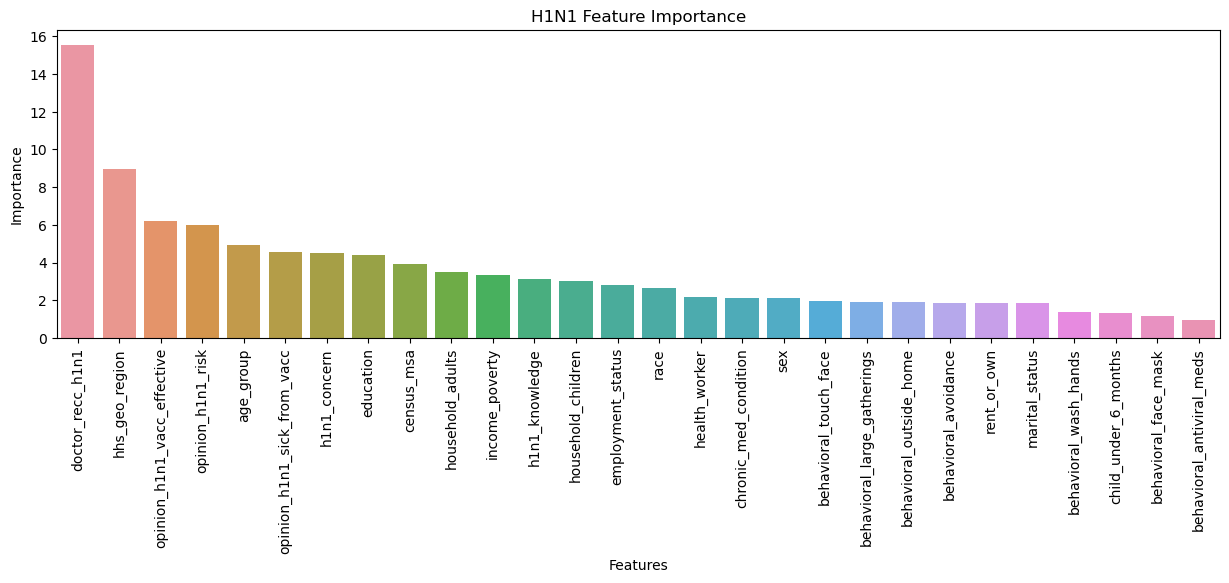

,doctor_recc_h1n1,hhs_geo_region,opinion_h1n1_vacc_effective,opinion_h1n1_risk,age_group,opinion_h1n1_sick_from_vacc,h1n1_concern,education,census_msa,household_adults,income_poverty,h1n1_knowledge,household_children,employment_status,race,health_worker,chronic_med_condition,sex,behavioral_touch_face,behavioral_large_gatherings,behavioral_outside_home,behavioral_avoidance,rent_or_own,marital_status,behavioral_wash_hands,child_under_6_months,behavioral_face_mask,behavioral_antiviral_meds
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,8,2,0,3,1,1,1,2,0,2,0,0,1,3,0,0,0,1,0,1,0,0,1,0,0,0,0
1,0,1,4,3,1,3,3,0,0,0,2,2,0,0,3,0,0,1,1,0,1,1,1,1,1,0,0,0
2,0,9,2,0,0,0,1,2,0,2,0,1,0,0,3,0,1,1,0,0,0,1,0,1,0,0,0,0
3,0,5,2,2,4,4,1,0,1,0,2,1,0,1,3,0,1,0,0,1,0,1,1,1,1,0,0,0
4,0,9,2,2,2,1,2,3,0,1,0,1,0,0,3,0,0,0,1,1,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,0,9,2,0,4,0,2,3,2,0,0,0,0,1,3,0,0,0,0,0,1,1,0,1,0,0,0,0
26703,1,6,3,1,0,1,1,2,1,1,0,2,0,0,3,1,0,1,0,0,0,1,1,1,1,0,0,0
26704,0,6,3,3,3,1,2,3,0,0,2,2,0,2,3,0,0,0,1,1,0,1,0,1,1,0,1,0


In [49]:
# Visualize the importance of features and rank them from highest to lowest
plt.figure(figsize=(15,4))
sns.barplot(data = importance_h1n1.sort_values(by='Importance',ascending=False),x='Features', y='Importance')
plt.title('H1N1 Feature Importance')
plt.xticks(rotation = 90)
plt.show()
X_h1n1=X_h1n1[importance_h1n1['Features']]
X_h1n1

## 4.2 Seasonal_Importance

In [50]:
# Visualize the importance of features and rank them from highest to lowest
model_seasonal = RandomForestRegressor(n_estimators=200)
model_seasonal = model_seasonal.fit(X_seas,y_seas)
# show the importance of each feature
importance_seasonal=pd.DataFrame({'Features':np.array(X_seas.columns),'Importance':model_seasonal.feature_importances_*100 }).sort_values(by='Importance', ascending=False)
importance_seasonal

,Features,Importance
11,opinion_seas_vacc_effective,15.090394
7,doctor_recc_seasonal,9.378175
22,hhs_geo_region,9.364359
12,opinion_seas_risk,7.898956
14,age_group,6.826524
15,education,4.687720
13,opinion_seas_sick_from_vacc,4.319949
23,census_msa,3.998866
24,household_adults,3.644004
18,income_poverty,3.451068


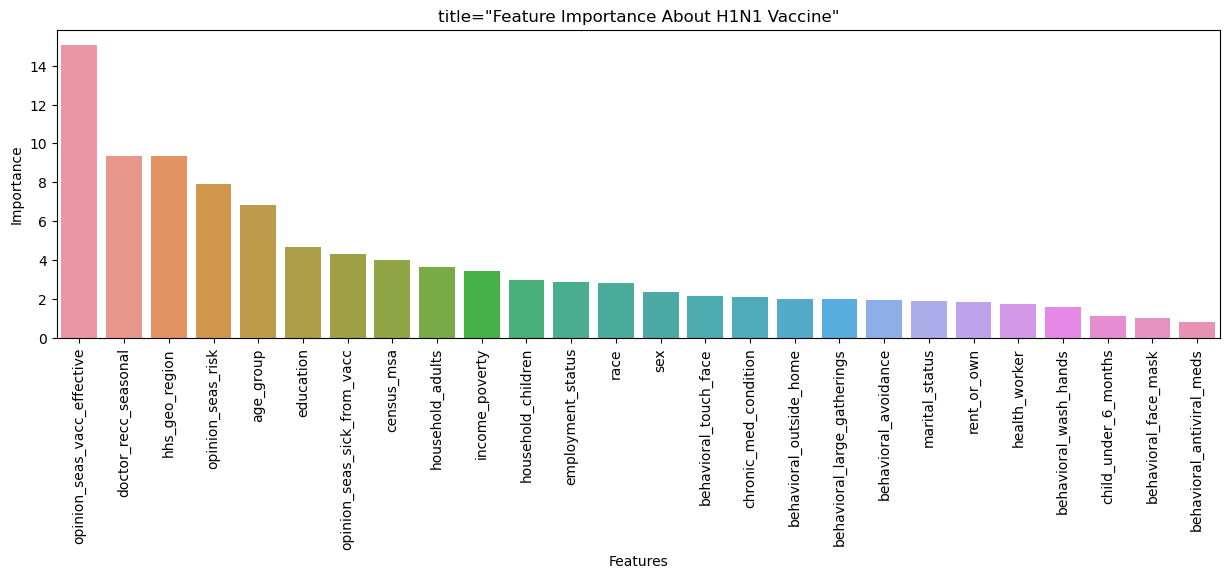

,opinion_seas_vacc_effective,doctor_recc_seasonal,hhs_geo_region,opinion_seas_risk,age_group,education,opinion_seas_sick_from_vacc,census_msa,household_adults,income_poverty,household_children,employment_status,race,sex,behavioral_touch_face,chronic_med_condition,behavioral_outside_home,behavioral_large_gatherings,behavioral_avoidance,marital_status,rent_or_own,health_worker,behavioral_wash_hands,child_under_6_months,behavioral_face_mask,behavioral_antiviral_meds
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1,0,8,0,3,1,1,2,0,2,0,1,3,0,1,0,1,0,0,1,0,0,0,0,0,0
1,3,0,1,1,1,0,3,0,0,2,0,0,3,1,1,0,1,0,1,1,1,0,1,0,0,0
2,3,0,9,0,0,2,1,0,2,0,0,0,3,1,0,1,0,0,1,1,0,0,0,0,0,0
3,4,1,5,3,4,0,0,1,0,2,0,1,3,0,0,1,0,1,1,1,1,0,1,0,0,0
4,2,0,9,0,2,3,3,0,1,0,0,0,3,0,1,0,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,0,9,1,4,3,1,2,0,0,0,1,3,0,0,0,1,0,1,1,0,0,0,0,0,0
26703,4,1,6,0,0,2,0,1,1,0,0,0,3,1,0,0,0,0,1,1,1,1,1,0,0,0
26704,4,0,6,3,3,3,1,0,0,2,0,2,3,0,1,0,0,1,1,1,0,0,1,0,1,0


In [51]:
plt.figure(figsize=(15,4))
sns.barplot(data = importance_seasonal.sort_values(by='Importance',ascending=False),x='Features', y='Importance')
plt.title('title="Feature Importance About H1N1 Vaccine"')
plt.xticks(rotation = 90)
plt.show()
X_seas=X_seas[importance_seasonal['Features']]
X_seas

# 5. Building models

## 5.1 Logistic Regression and XGBoost

In [52]:
# Separate data
X_train_h,X_test_h,y_train_h,y_test_h = train_test_split(X_h1n1, y_h1n1, test_size = 0.2, random_state = 420)
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_seas, y_seas, test_size = 0.2, random_state = 420)

In [53]:
hscore_l = {}
hscore_x = {}
sscore_l = {}
sscore_x = {}
def f1_score_test(model, train_feature,train_labels,contain): # Calculating f1 scores using different numbers of features
    for n in range(5,33,2): 
        # model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0)
        train_accuracy = cross_val_score(model, train_feature.iloc[:,0:n], train_labels.ravel(), cv=5, scoring='f1')  #accuracy based on 5-fold cv
        contain[n]=np.mean(train_accuracy)   # mean accuracy after 5-fold cv
        print(f"features number ={n}, F1 Score: {train_accuracy}")

In [54]:
#Calculate the score using logistic regression and derive the optimal number of features
f1_score_test(LogisticRegression(solver='saga',max_iter = 4000,random_state=420),X_h1n1,y_h1n1,hscore_l)
feature_num_h1n1=max(hscore_l, key=hscore_l.get)
feature_num_h1n1

features number =5, F1 Score: [0.47576099 0.47667229 0.48089888 0.49663677 0.46527386]
features number =7, F1 Score: [0.48027057 0.47495779 0.47909605 0.50084794 0.46786922]
features number =9, F1 Score: [0.48532731 0.4735062  0.48345485 0.50225734 0.4700565 ]
features number =11, F1 Score: [0.48587571 0.4743662  0.48403361 0.50112867 0.47231638]
features number =13, F1 Score: [0.48963585 0.47928331 0.49215247 0.50508475 0.47968397]
features number =15, F1 Score: [0.48871332 0.47480403 0.49244544 0.50537027 0.47651387]
features number =17, F1 Score: [0.50911099 0.49724366 0.50716648 0.52608213 0.49888641]
features number =19, F1 Score: [0.50853054 0.48947951 0.50825083 0.52684007 0.49833148]
features number =21, F1 Score: [0.50963126 0.50409165 0.50165017 0.52689961 0.49357901]
features number =23, F1 Score: [0.50989011 0.50082012 0.50357339 0.52742382 0.49330357]
features number =25, F1 Score: [0.51265127 0.49972543 0.51262349 0.52602436 0.4991662 ]
features number =27, F1 Score: [0.5

25

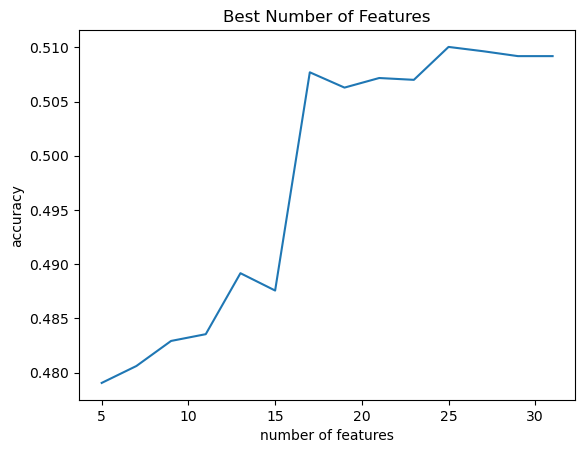

In [55]:
#plot the accuracy
plt.plot(list(hscore_l.keys()) ,hscore_l.values())
plt.title('Best Number of Features')
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

In [56]:
# Calculate the score after using the optimum number of features
def f1_score2(model, feature_num,train_features,train_labels):
    # lg = LogisticRegression(solver='saga',max_iter = 4000,random_state=420)  
    model_scores  = cross_val_score(model, train_features.iloc[:,0:feature_num], train_labels.ravel(), cv=5, scoring='f1')  #accuracy based on 5-fold cv
    model_acc_mean=np.mean(model_scores )   # mean accuracy after 5-fold cv
    print("features number ={}, F1 Score avg = {},\n5-fold F1 Score: {},".format(feature_num,model_acc_mean,model_scores ))


In [57]:
f1_score2(LogisticRegression(solver='saga',max_iter = 4000,random_state=420),feature_num_h1n1,X_h1n1,y_h1n1)

features number =25, F1 Score avg = 0.5100381496132933,
5-fold F1 Score: [0.51265127 0.49972543 0.51262349 0.52602436 0.4991662 ],


In [58]:
lg = LogisticRegression(solver='saga',max_iter = 4000,random_state=420)  
lg.fit(X_train_h.iloc[:,0:feature_num_h1n1], y_train_h.ravel())
y_h1n1_prd = lg.predict(X_test_h.iloc[:,0:feature_num_h1n1])
print(f1_score(y_test_h,y_h1n1_prd))

0.5232113599126161


In [59]:
# Visualisation of the roc curve
probs = lg.predict_proba(X_test_h.iloc[:,0:feature_num_h1n1])
preds = probs[:,1]
fpr_lg, tpr_lg, threshold_lg = metrics.roc_curve(y_test_h, preds)
roc_auc_lg = metrics.auc(fpr_lg, tpr_lg)

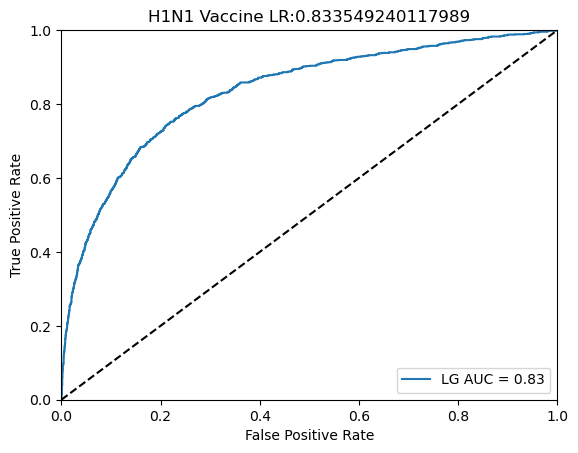

In [60]:
plt.title(f'H1N1 Vaccine LR:{roc_auc_lg}')
plt.plot(fpr_lg, tpr_lg, label = 'LG AUC = %0.2f' % roc_auc_lg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

features number =5, F1 Score: [0.47955182 0.47977528 0.48071548 0.50611791 0.47429519]
features number =7, F1 Score: [0.49808429 0.50462208 0.50759219 0.52788515 0.48910675]
features number =9, F1 Score: [0.51480883 0.50406504 0.51385117 0.53200883 0.48547945]
features number =11, F1 Score: [0.51533082 0.50728548 0.51682953 0.53871681 0.48264463]
features number =13, F1 Score: [0.51185345 0.50538793 0.5210356  0.53487095 0.49511401]
features number =15, F1 Score: [0.5228967  0.51024811 0.51991389 0.53778751 0.49918256]
features number =17, F1 Score: [0.52704874 0.50956807 0.53262032 0.54021076 0.5133515 ]
features number =19, F1 Score: [0.52281267 0.50980392 0.5345474  0.54063018 0.52065217]
features number =21, F1 Score: [0.52744887 0.51431659 0.53582888 0.54051054 0.51774986]
features number =23, F1 Score: [0.53004292 0.51243243 0.53447354 0.53533667 0.51965066]
features number =25, F1 Score: [0.5288721  0.51024811 0.53498385 0.5393134  0.51609384]
features number =27, F1 Score: [0.5

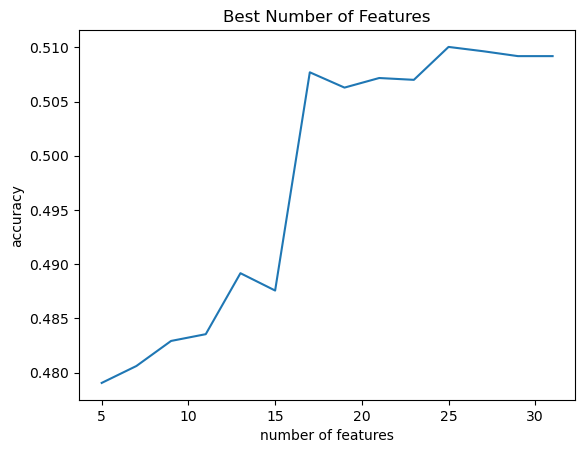

features number =21, F1 Score avg = 0.5271709479379851,
5-fold F1 Score: [0.52744887 0.51431659 0.53582888 0.54051054 0.51774986],
0.5336225596529285


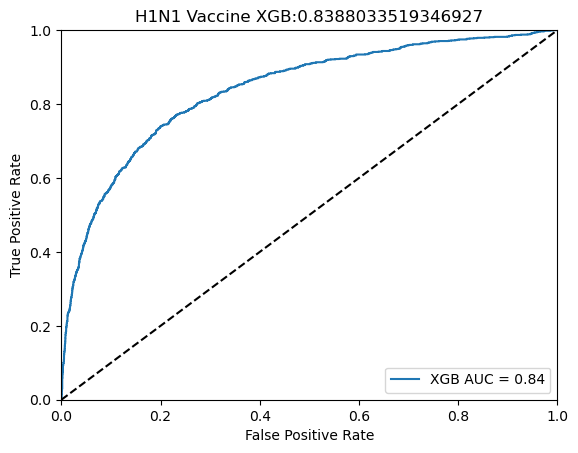

In [61]:
f1_score_test(xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0),X_h1n1,y_h1n1,hscore_x)
feature_num_h1n1=max(hscore_x, key=hscore_x.get)


#plot the accuracy
plt.plot(list(hscore_l.keys()) ,hscore_l.values())
plt.title('Best Number of Features')
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

f1_score2(xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0),feature_num_h1n1,X_h1n1,y_h1n1)
xb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0)
xb.fit(X_train_h.iloc[:,0:feature_num_h1n1], y_train_h.ravel())
y_h1n1_prd = xb.predict(X_test_h.iloc[:,0:feature_num_h1n1])
print(f1_score(y_test_h,y_h1n1_prd))

probs = xb.predict_proba(X_test_h.iloc[:,0:feature_num_h1n1])
preds = probs[:,1]
fpr_xb, tpr_xb, threshold_xb = metrics.roc_curve(y_test_h, preds)
roc_auc_xb = metrics.auc(fpr_xb, tpr_xb)

plt.title(f'H1N1 Vaccine XGB:{roc_auc_xb}')
plt.plot(fpr_xb, tpr_xb, label = 'XGB AUC = %0.2f' % roc_auc_xb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

features number =5, F1 Score: [0.72173182 0.72522898 0.72964994 0.73130545 0.73349938]
features number =7, F1 Score: [0.7283719  0.7368638  0.73747662 0.74504072 0.74491264]
features number =9, F1 Score: [0.72923588 0.73996294 0.73738842 0.74618759 0.7411668 ]
features number =11, F1 Score: [0.7288206  0.73915725 0.73692946 0.74499165 0.7419885 ]
features number =13, F1 Score: [0.72987552 0.74023839 0.73955519 0.74661105 0.74375387]
features number =15, F1 Score: [0.73808537 0.7418495  0.74331883 0.7472436  0.74336283]
features number =17, F1 Score: [0.73577067 0.74616486 0.74216967 0.7502608  0.7470673 ]
features number =19, F1 Score: [0.73640515 0.74580434 0.74362694 0.75109352 0.74804768]
features number =21, F1 Score: [0.7332501  0.74468085 0.74539051 0.74628116 0.74809475]
features number =23, F1 Score: [0.73974306 0.74954072 0.74798762 0.75715181 0.74614594]
features number =25, F1 Score: [0.74037267 0.75102041 0.74731627 0.75589894 0.74620123]
features number =27, F1 Score: [0.7

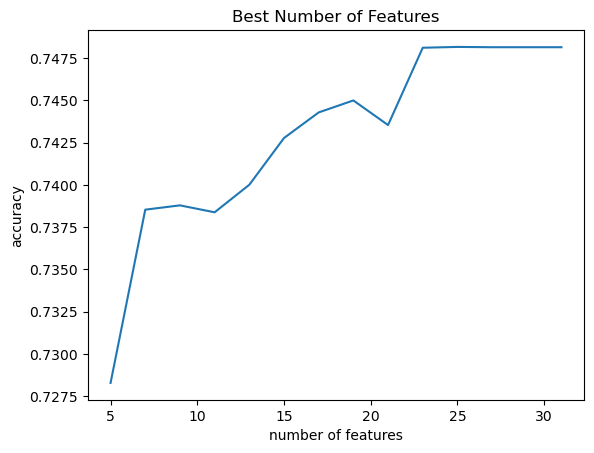

features number =25, F1 Score avg = 0.748161902722113,
5-fold F1 Score: [0.74037267 0.75102041 0.74731627 0.75589894 0.74620123],
0.7507270461154966


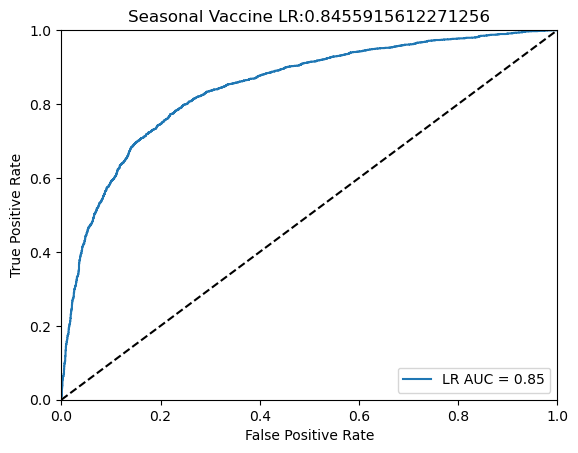

In [62]:
f1_score_test(LogisticRegression(solver='saga',max_iter = 4000,random_state=420),X_seas,y_seas,sscore_l)
feature_num_seasonal=max(sscore_l, key=sscore_l.get)
feature_num_seasonal

#plot the accuracy
plt.plot(list(sscore_l.keys()) ,sscore_l.values())
plt.title('Best Number of Features')
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

f1_score2(LogisticRegression(solver='saga',max_iter = 4000,random_state=420),feature_num_seasonal,X_seas,y_seas)
lr_s = LogisticRegression(solver='saga',max_iter = 4000,random_state=420)
lr_s.fit(X_train_s.iloc[:,0:feature_num_seasonal], y_train_s.ravel())
y_seasonal_prd = lr_s.predict(X_test_s.iloc[:,0:feature_num_seasonal])
print(f1_score(y_test_s,y_seasonal_prd))

probs = lr_s.predict_proba(X_test_s.iloc[:,0:feature_num_seasonal])
preds = probs[:,1]
fpr_lr_s, tpr_lr_s, threshold_lr_s = metrics.roc_curve(y_test_s, preds)
roc_auc_lr_s = metrics.auc(fpr_lr_s, tpr_lr_s)

plt.title(f'Seasonal Vaccine LR:{roc_auc_lr_s}')
plt.plot(fpr_lr_s, tpr_lr_s, label = 'LR AUC = %0.2f' % roc_auc_lr_s)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

features number =5, F1 Score: [0.72822227 0.73796353 0.73812979 0.74070999 0.742197  ]
features number =7, F1 Score: [0.74394748 0.75198696 0.75061325 0.75481755 0.75604839]
features number =9, F1 Score: [0.74519427 0.75340516 0.75199346 0.75707838 0.75409836]
features number =11, F1 Score: [0.74637237 0.75228984 0.75117755 0.75932759 0.754671  ]
features number =13, F1 Score: [0.74969275 0.75285948 0.7485644  0.75704588 0.75369358]
features number =15, F1 Score: [0.75383671 0.75801511 0.75344438 0.75792507 0.7545565 ]
features number =17, F1 Score: [0.75323077 0.75770565 0.75298477 0.75712515 0.75637394]
features number =19, F1 Score: [0.75568298 0.75724194 0.75329489 0.75670103 0.75551955]
features number =21, F1 Score: [0.75144033 0.7581139  0.75200989 0.75696882 0.7536526 ]
features number =23, F1 Score: [0.75925926 0.76012333 0.75833676 0.76350093 0.7575696 ]
features number =25, F1 Score: [0.75731356 0.75922888 0.75813762 0.76404959 0.75554651]
features number =27, F1 Score: [0.7

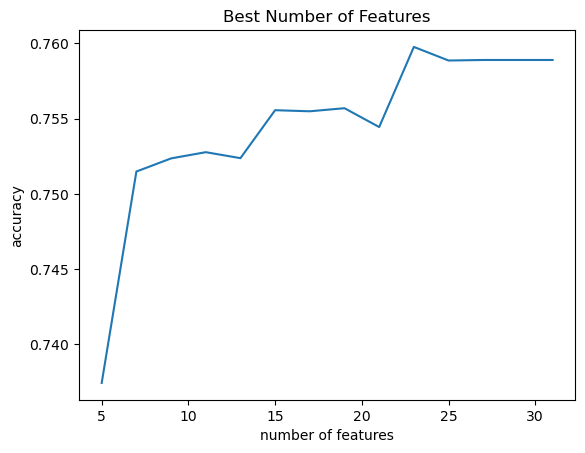

features number =23, F1 Score avg = 0.7597579768081548,
5-fold F1 Score: [0.75925926 0.76012333 0.75833676 0.76350093 0.7575696 ],
0.76149247577819


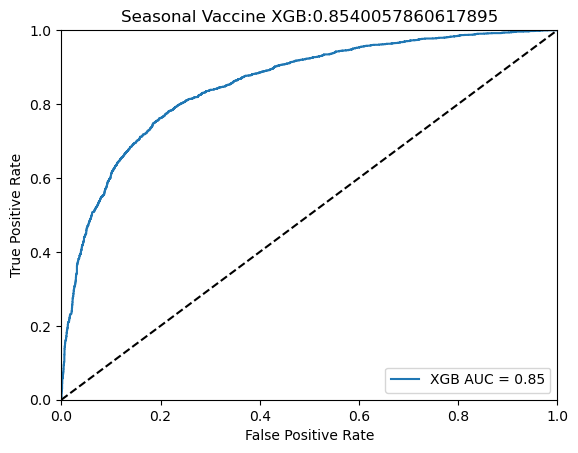

In [63]:
f1_score_test(xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0),X_seas,y_seas,sscore_x)
feature_num_seasonal = max(sscore_x, key=sscore_x.get)
feature_num_seasonal

#plot the accuracy
plt.plot(list(sscore_x.keys()) ,sscore_x.values())
plt.title('Best Number of Features')
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

f1_score2(xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0),feature_num_seasonal,X_seas,y_seas)
xb_s = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, objective='binary:logistic', seed=0)
xb_s.fit(X_train_s.iloc[:,0:feature_num_seasonal], y_train_s.ravel())
y_seasonal_prd = xb_s.predict(X_test_s.iloc[:,0:feature_num_seasonal])
print(f1_score(y_test_s,y_seasonal_prd))

probs = xb_s.predict_proba(X_test_s.iloc[:,0:feature_num_seasonal])
preds = probs[:,1]
fpr_xb_s, tpr_xb_s, threshold_xb_s = metrics.roc_curve(y_test_s, preds)
roc_auc_xb_s = metrics.auc(fpr_xb_s, tpr_xb_s)

plt.title(f'Seasonal Vaccine XGB:{roc_auc_xb_s}')
plt.plot(fpr_xb_s, tpr_xb_s, label = 'XGB AUC = %0.2f' % roc_auc_xb_s)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Prediction

In [66]:
test = pd.read_csv('test_set_features.csv',index_col=0)
test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Hispanic,Female,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,5.0,4.0,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,2.0,2.0,4.0,4.0,2.0,65+ Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Black,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53410,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,NaN,4.0,2.0,2.0,4.0,2.0,1.0,35 - 44 Years,NaN,White,Female,NaN,NaN,NaN,NaN,dqpwygqj,"MSA, Principle City",1.0,1.0,NaN,NaN
53411,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,1.0,1.0,5.0,2.0,2.0,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Rent,Employed,qufhixun,Non-MSA,1.0,3.0,fcxhlnwr,vlluhbov
53412,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,1.0,4.0,3.0,1.0,18 - 34 Years,Some College,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,qufhixun,"MSA, Not Principle City",1.0,0.0,NaN,NaN


In [67]:
test.drop(['health_insurance','employment_industry','employment_occupation'],axis=1,inplace=True)

In [68]:
test_num_data = [] # Putting numeric features into num_data
for col in test.columns.to_list():
    if test[col].dtype != 'object':
        test_num_data.append(col)

test_str_data = [] # Putting object features into str_data
for col in test.columns.to_list():
    if test[col].dtype == 'object':
        test_str_data.append(col)
print(test_num_data)
test_str_data

['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa']

In [69]:
for col in test_num_data:
    mean = round(test[col].mean())
    imputer=SimpleImputer(missing_values=np.nan,strategy='constant',fill_value=mean) # mean
    test[col] = imputer.fit_transform(test[[col]])


for col in test_str_data:
    categories = test[col].dropna().unique()
    test[col] = test[col].apply(lambda x: np.random.choice(categories) if pd.isna(x) else x)

In [73]:
LE = LabelEncoder()
for col in test.columns.to_list():
   test[col] = LE.fit_transform(test[col])

In [76]:
print(X_train_h.iloc[0:feature_num_h1n1])

               doctor_recc_h1n1  hhs_geo_region  opinion_h1n1_vacc_effective  \
respondent_id                                                                  
13847                         0               3                            4   
22364                         0               7                            4   
16615                         0               9                            3   
2968                          0               6                            0   
24811                         1               4                            2   
9959                          0               5                            2   
20147                         0               3                            2   
20282                         0               6                            1   
10653                         0               4                            1   
7119                          0               8                            0   
3984                          0         

In [81]:
test_h1n1 = test[['doctor_recc_h1n1','hhs_geo_region','opinion_h1n1_vacc_effective','opinion_h1n1_risk','age_group','opinion_h1n1_sick_from_vacc','h1n1_concern','education','census_msa','household_adults','income_poverty','h1n1_knowledge','household_children','employment_status','race','health_worker','chronic_med_condition','sex','behavioral_touch_face','behavioral_large_gatherings','behavioral_outside_home']]

In [91]:
test_seas = test[['opinion_seas_vacc_effective','doctor_recc_seasonal','hhs_geo_region','opinion_seas_risk','age_group','education','opinion_seas_sick_from_vacc','census_msa','household_adults','income_poverty','household_children','employment_status','race','sex','behavioral_touch_face','chronic_med_condition','behavioral_outside_home','behavioral_large_gatherings','behavioral_avoidance','marital_status','rent_or_own','health_worker','behavioral_wash_hands']]

In [95]:
y_h1n1_prd_test = xb.predict_proba(test_h1n1)
y_h1n1_prd_test

array([[0.8788302 , 0.12116979],
       [0.9427858 , 0.05721422],
       [0.6278386 , 0.37216136],
       ...,
       [0.8795349 , 0.12046511],
       [0.969429  , 0.03057101],
       [0.5724954 , 0.4275046 ]], dtype=float32)

In [96]:
y_seasonal_prd_test= xb_s.predict_proba(test_seas)
y_seasonal_prd_test

array([[0.8099897 , 0.1900103 ],
       [0.94698584, 0.05301415],
       [0.24044162, 0.7595584 ],
       ...,
       [0.7873715 , 0.21262847],
       [0.6263869 , 0.3736131 ],
       [0.37236643, 0.6276336 ]], dtype=float32)

In [87]:
submission_df = pd.read_csv('submission_format.csv',index_col=0)

In [88]:
submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [98]:
# Make sure we have the rows in the same order
np.testing.assert_array_equal(test.index.values, 
                              submission_df.index.values)

# Save predictions to submission data frame
submission_df["h1n1_vaccine"] = y_h1n1_prd_test[:, 1]
submission_df["seasonal_vaccine"] = y_seasonal_prd_test[:, 1]

submission_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
26707,0.121170,0.190010
26708,0.057214,0.053014
26709,0.372161,0.759558
26710,0.482328,0.842127
26711,0.183476,0.392678


In [99]:
submission_df.to_csv('my_submission.csv', index=True)